In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
sys.path.append("../../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines
import plotTools as ptools
import utils
import importlib
import coffea.util as util
import time
import json
import os
import glob
import pandas as pd

### Import coffea files

In [2]:
prefix = './coffea/'

In [3]:
sig_histo = util.load(f'{prefix}/signal_v9_SR_dPhiMETj0Tight_BDTretrain.coffea')[0]

In [4]:
# AOD + old x-cleaning + old xsec
sig_histo_legacy = util.load(f'../Ntuple_Update_April/coffea/signal_v2_AOD_OldXclean_OldXsec.coffea')[0]

### Efficiency

#### MINIAOD + new x-cleaning + v5 good_vtx + dPhiMETj0 tighter to 2.0 + BDT retrained

In [5]:
df_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')
df_cutflow

Preselections  n(good vertex) > 0  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100        0.021352            0.007683   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100         0.018018            0.005847   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10         0.043869            0.022408   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1          0.056431            0.021338   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100        0.018569            0.006590   
...                                                ...                 ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1         0.062309            0.023682   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100         0.002227            0.000317   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1         0.055053            0.018355   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100       0.020529            0.006955   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10        0.041935            0.019837   

                                         computing BDT score  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100              0.007683   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100               0.005847   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10               0.022408   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                0.021338   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100              0.006590   
...                                                      ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1               0.023682   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100               0.000317   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1               0.018355   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100             0.006955   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10              0.019837   

                                         No b-tagged jets  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100           0.006617   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100            0.005035   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10            0.019378   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1             0.018394   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100           0.005723   
...                                                   ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1            0.020386   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100            0.000273   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1            0.015557   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100          0.006011   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10           0.017133   

                                         Leading jet |eta| < 2.4  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                  0.006399   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                   0.004931   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                   0.018910   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                    0.017895   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100                  0.005572   
...                                                          ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1                   0.019816   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100                   0.000264   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                   0.015163   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                 0.005850   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10                  0.016668   

                                         Leading jet pT > 80 GeV  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                  0.006397   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                   0.004931   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                   0.018906   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                    0.017879   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100                  0.005572   
...                                                          ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1                   0.019796   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100                   0.000264   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                   0.015163   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                 0.005848   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1

In [6]:
df_purity = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')
df_purity

Preselections  n(good vertex) > 0  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100             1.0            0.963502   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100              1.0            0.959202   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10              1.0            0.973284   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1               1.0            0.971685   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100             1.0            0.963969   
...                                                ...                 ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1              1.0            0.971650   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100              1.0            0.863745   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1              1.0            0.970196   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100            1.0            0.963446   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10             1.0            0.975476   

                                         computing BDT score  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100              0.963502   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100               0.959202   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10               0.973284   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                0.971685   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100              0.963969   
...                                                      ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1               0.971650   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100               0.863745   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1               0.970196   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100             0.963446   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10              0.975476   

                                         No b-tagged jets  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100           0.963750   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100            0.959090   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10            0.973132   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1             0.972443   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100           0.966051   
...                                                   ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1            0.973350   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100            0.862597   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1            0.969729   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100          0.965615   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10           0.975029   

                                         Leading jet |eta| < 2.4  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                  0.963956   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                   0.959874   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                   0.973189   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                    0.972127   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100                  0.967070   
...                                                          ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1                   0.972974   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100                   0.865791   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                   0.972300   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                 0.965320   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10                  0.975189   

                                         Leading jet pT > 80 GeV  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                  0.963946   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                   0.959874   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                   0.973286   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                    0.972102   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100                  0.967070   
...                                                          ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1                   0.972947   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100                   0.865791   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                   0.972300   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                 0.965312   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1

#### AOD + old x-cleaning + OSSF&ID good_vtx + dPhiMETj0 "loose" of 1.5 + BDT legacy

In [7]:
df_cutflow_legacy = utils.get_signal_cutflow_dict(sig_histo_legacy, 'cutflow')
df_cutflow_legacy

Preselections  n(good vertex) > 0  \
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100         0.041559            0.004565   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100        0.042898            0.005171   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1          0.065041            0.015343   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10         0.060097            0.011533   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100        0.038143            0.004461   
...                                                ...                 ...   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10          0.012434            0.001380   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1           0.015928            0.002349   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100       0.046038            0.005306   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10        0.064997            0.010966   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1         0.073740            0.014937   

                                         computing BDT score  \
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100               0.004565   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100              0.005171   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                0.015343   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10               0.011533   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100              0.004461   
...                                                      ...   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10                0.001380   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1                 0.002349   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100             0.005306   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10              0.010966   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1               0.014937   

                                         No b-tagged jets  \
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100            0.003872   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100           0.004361   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1             0.012976   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10            0.009790   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100           0.003821   
...                                                   ...   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10             0.001180   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1              0.002024   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100          0.004454   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10           0.009430   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1            0.012755   

                                         Leading jet |eta| < 2.4  \
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                   0.003775   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                  0.004208   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                    0.012527   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                   0.009461   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100                  0.003680   
...                                                          ...   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10                    0.001116   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1                     0.001882   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                 0.004327   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10                  0.009151   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                   0.012361   

                                         Leading jet pT > 80 GeV  \
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                   0.003775   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                  0.004206   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                    0.012527   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                   0.009457   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100                  0.003677   
...                                                          ...   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10                    0.001116   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1                     0.001880   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                 0.004325   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10                  0.009150   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1

In [8]:
df_purity_legacy = utils.get_signal_cutflow_dict(sig_histo_legacy, 'cutflow_vtx_matched')
df_purity_legacy

Preselections  n(good vertex) > 0  \
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100              1.0            0.307496   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100             1.0            0.376332   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1               1.0            0.657401   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10              1.0            0.576880   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100             1.0            0.375825   
...                                                ...                 ...   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10               1.0            0.350253   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1                1.0            0.440402   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100            1.0            0.327149   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10             1.0            0.519578   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1              1.0            0.595299   

                                         computing BDT score  \
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100               0.307496   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100              0.376332   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                0.657401   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10               0.576880   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100              0.375825   
...                                                      ...   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10                0.350253   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1                 0.440402   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100             0.327149   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10              0.519578   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1               0.595299   

                                         No b-tagged jets  \
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100            0.320206   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100           0.381915   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1             0.671896   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10            0.591127   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100           0.386075   
...                                                   ...   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10             0.350479   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1              0.440961   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100          0.341337   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10           0.523695   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1            0.598932   

                                         Leading jet |eta| < 2.4  \
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                   0.321148   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                  0.381349   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                    0.673721   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                   0.593803   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100                  0.388090   
...                                                          ...   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10                    0.356567   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1                     0.444533   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                 0.339790   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10                  0.523081   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                   0.599054   

                                         Leading jet pT > 80 GeV  \
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                   0.321148   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                  0.381517   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                    0.673721   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                   0.594039   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100                  0.388469   
...                                                          ...   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10                    0.356567   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1                     0.445046   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                 0.339890   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10                  0.523158   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1

### Compare efficiency at the end of SR across different signal samples

In [9]:
def get_df(sig_histo, ct, delta, cut_idx = -1):
    si = utils.get_signal_point_dict(sig_histo)
    
    points = (si["ctau"] == ct) & (si["delta"] == delta)
    
    table = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')
    
    df = table.loc[list(si[points].name)]
    df = pd.DataFrame(df.iloc[:, cut_idx])
    
    m1_list = []
    delta_list = []
    ctau_list = []
    
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1_list.append(sig_dict['m1'])
        delta_list.append(sig_dict['delta'])
        ctau_list.append(sig_dict['ctau'])
    
    df['m1'] = m1_list
    df['delta'] = delta_list
    df['ctau'] = ctau_list
    
    df = df.sort_values(by=['m1']) # sort by m1
    return df

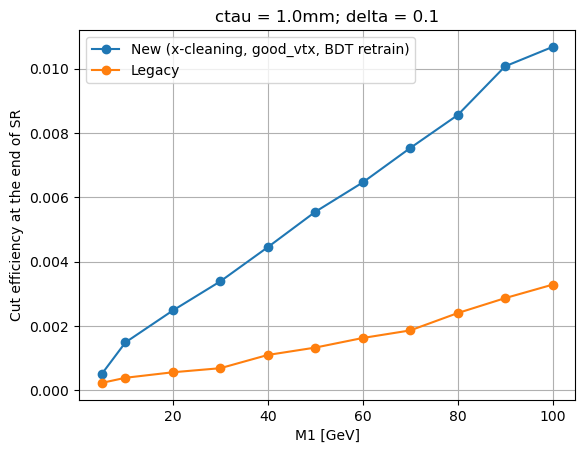

In [10]:
ct = 1.0
delta = 0.1

df_new = get_df(sig_histo, ct, delta, cut_idx = -1)
df_legacy = get_df(sig_histo_legacy, ct, delta, cut_idx = -1)

plt.plot(df_new.iloc[:,1], df_new.iloc[:,0], '-o', label='New (x-cleaning, good_vtx, BDT retrain)')
plt.plot(df_legacy.iloc[:,1], df_legacy.iloc[:,0], '-o', label='Legacy')

plt.xlabel('M1 [GeV]')
plt.ylabel('Cut efficiency at the end of SR')
plt.title(f'ctau = {ct}mm; delta = {delta}')

plt.legend()

plt.grid()

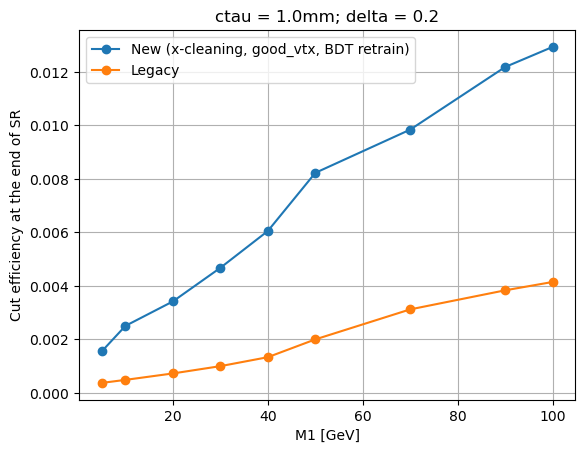

In [11]:
ct = 1.0
delta = 0.2

df_new = get_df(sig_histo, ct, delta, cut_idx = -1)
df_legacy = get_df(sig_histo_legacy, ct, delta, cut_idx = -1)

plt.plot(df_new.iloc[:,1], df_new.iloc[:,0], '-o', label='New (x-cleaning, good_vtx, BDT retrain)')
plt.plot(df_legacy.iloc[:,1], df_legacy.iloc[:,0], '-o', label='Legacy')

plt.xlabel('M1 [GeV]')
plt.ylabel('Cut efficiency at the end of SR')
plt.title(f'ctau = {ct}mm; delta = {delta}')

plt.legend()

plt.grid()

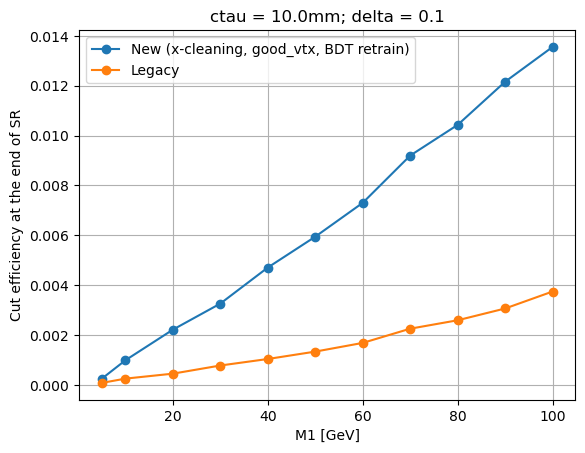

In [12]:
ct = 10.0
delta = 0.1

df_new = get_df(sig_histo, ct, delta, cut_idx = -1)
df_legacy = get_df(sig_histo_legacy, ct, delta, cut_idx = -1)

plt.plot(df_new.iloc[:,1], df_new.iloc[:,0], '-o', label='New (x-cleaning, good_vtx, BDT retrain)')
plt.plot(df_legacy.iloc[:,1], df_legacy.iloc[:,0], '-o', label='Legacy')

plt.xlabel('M1 [GeV]')
plt.ylabel('Cut efficiency at the end of SR')
plt.title(f'ctau = {ct}mm; delta = {delta}')

plt.legend()

plt.grid()

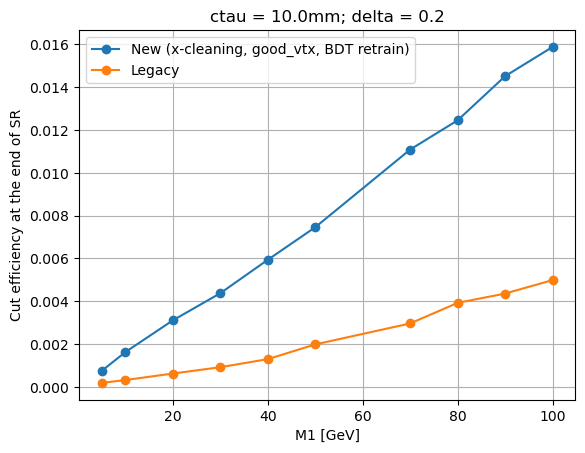

In [13]:
ct = 10.0
delta = 0.2

df_new = get_df(sig_histo, ct, delta, cut_idx = -1)
df_legacy = get_df(sig_histo_legacy, ct, delta, cut_idx = -1)

plt.plot(df_new.iloc[:,1], df_new.iloc[:,0], '-o', label='New (x-cleaning, good_vtx, BDT retrain)')
plt.plot(df_legacy.iloc[:,1], df_legacy.iloc[:,0], '-o', label='Legacy')

plt.xlabel('M1 [GeV]')
plt.ylabel('Cut efficiency at the end of SR')
plt.title(f'ctau = {ct}mm; delta = {delta}')

plt.legend()

plt.grid()

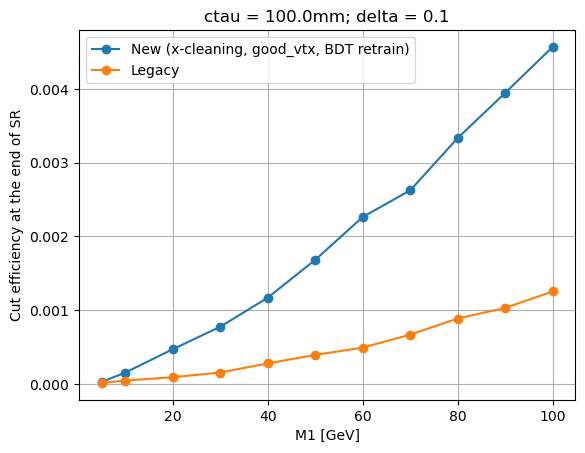

In [14]:
ct = 100.0
delta = 0.1

df_new = get_df(sig_histo, ct, delta, cut_idx = -1)
df_legacy = get_df(sig_histo_legacy, ct, delta, cut_idx = -1)

plt.plot(df_new.iloc[:,1], df_new.iloc[:,0], '-o', label='New (x-cleaning, good_vtx, BDT retrain)')
plt.plot(df_legacy.iloc[:,1], df_legacy.iloc[:,0], '-o', label='Legacy')

plt.xlabel('M1 [GeV]')
plt.ylabel('Cut efficiency at the end of SR')
plt.title(f'ctau = {ct}mm; delta = {delta}')

plt.legend()

plt.grid()

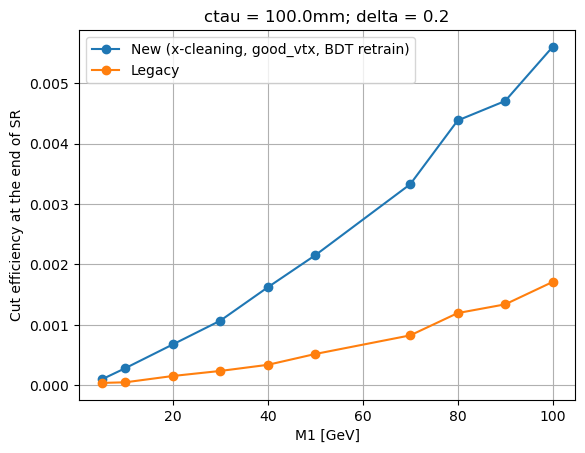

In [15]:
ct = 100.0
delta = 0.2

df_new = get_df(sig_histo, ct, delta, cut_idx = -1)
df_legacy = get_df(sig_histo_legacy, ct, delta, cut_idx = -1)

plt.plot(df_new.iloc[:,1], df_new.iloc[:,0], '-o', label='New (x-cleaning, good_vtx, BDT retrain)')
plt.plot(df_legacy.iloc[:,1], df_legacy.iloc[:,0], '-o', label='Legacy')

plt.xlabel('M1 [GeV]')
plt.ylabel('Cut efficiency at the end of SR')
plt.title(f'ctau = {ct}mm; delta = {delta}')

plt.legend()

plt.grid()

### Plot Efficiency

In [16]:
utils.get_signal_list_of_cuts(sig_histo)

['Preselections',
 'n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 2',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [17]:
utils.get_signal_list_of_cuts(sig_histo_legacy)

['Preselections',
 'n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'minDxy(e1, e2) > 0.01',
 'BDT']

In [18]:
def plot_signal_efficiency(sig_histo, df_cutflow, df_purity, m1s, deltas, ctaus, label, multPurity=False, doLog = True, ylabel = '', title = ''):
    cuts = utils.get_signal_list_of_cuts(sig_histo)
    cuts[6] = 'dPhi(MET,leading jet)'

    m1_list = []
    for point in df_cutflow.index.values:
        sig_dict = ptools.signalPoint(point)
        m1 = int(sig_dict['m1'])
        m1_list.append(m1)

    df_cutflow['m1'] = m1_list
    df_cutflow = df_cutflow.sort_values(by=['m1']) # sort by m1
    df_cutflow.pop('m1')

    df_purity['m1'] = m1_list
    df_purity = df_purity.sort_values(by=['m1']) # sort by m1
    df_purity.pop('m1')
        
    for point in df_cutflow.index.values:
        sig_dict = ptools.signalPoint(point)
        m1 = int(sig_dict['m1'])
        delta = sig_dict['delta']
        dmchi = sig_dict['dmchi']
        ctau = int(sig_dict['ctau'])
        
        if (m1 in m1s) and (delta in deltas):
            if ctau in ctaus:
                if multPurity:
                    plt.plot(cuts, df_cutflow.loc[point]*df_purity.loc[point], label=label)
                else:
                    plt.plot(cuts, df_cutflow.loc[point], label=label)
                #print(df_cutflow.loc[point])
                #print(df_purity.loc[point])
                #print(df_cutflow.loc[point]*df_purity.loc[point])

    plt.grid()

    if doLog:
        plt.yscale('log')
    
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
    plt.legend()

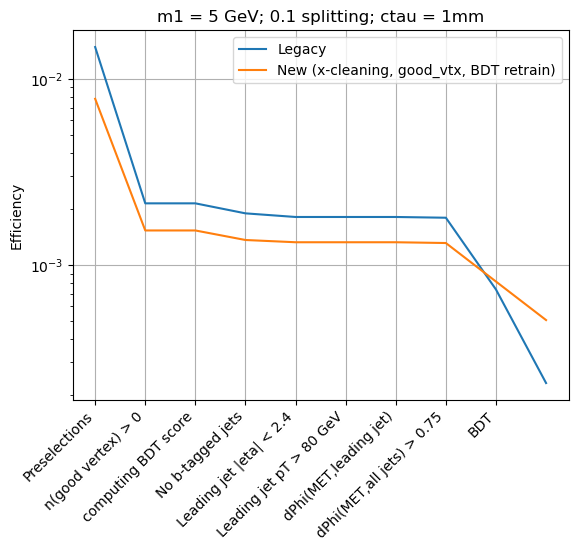

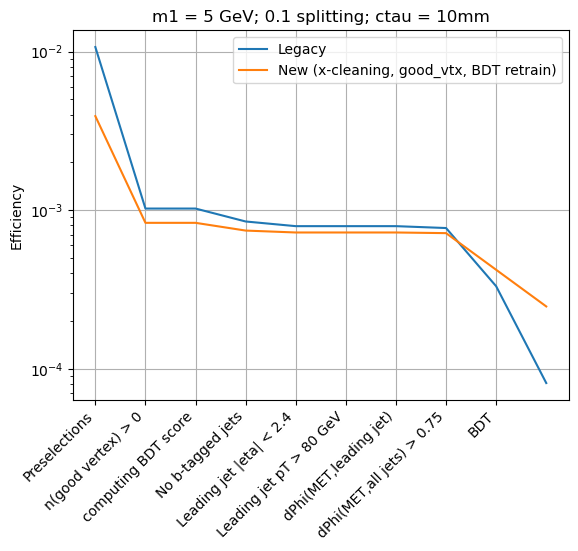

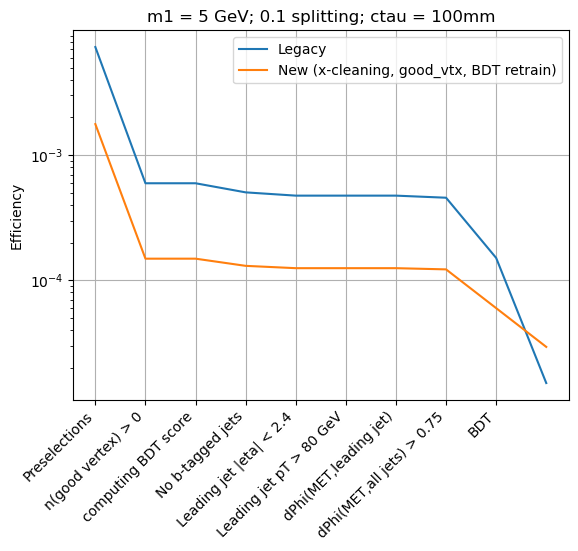

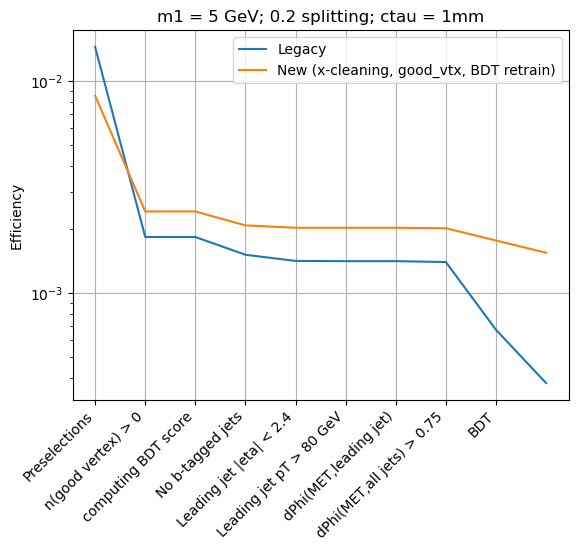

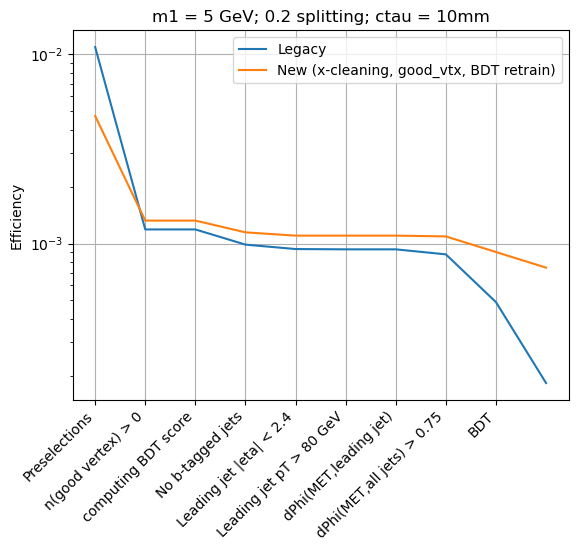

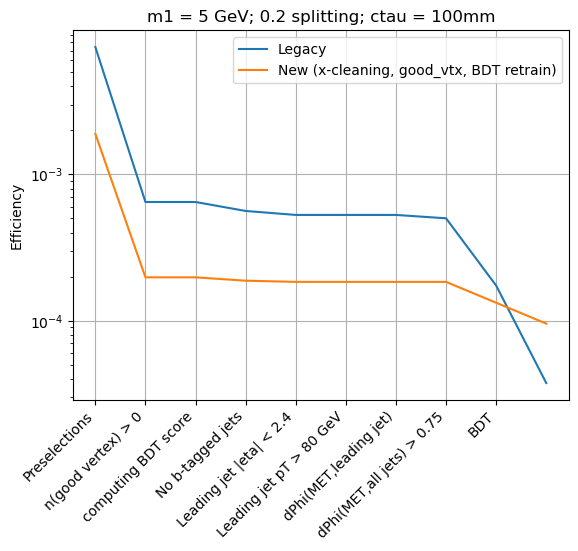

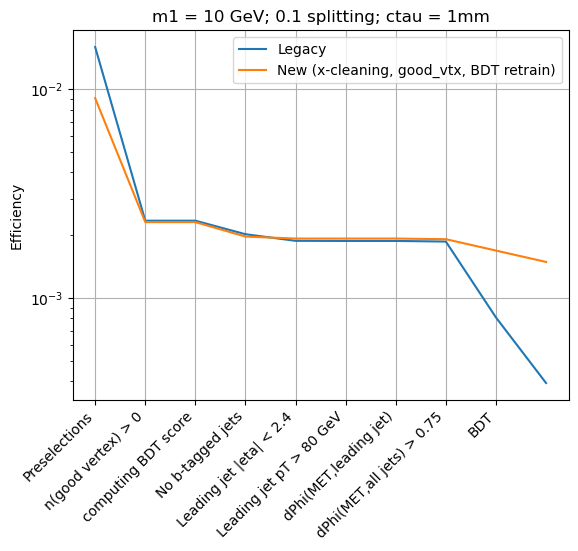

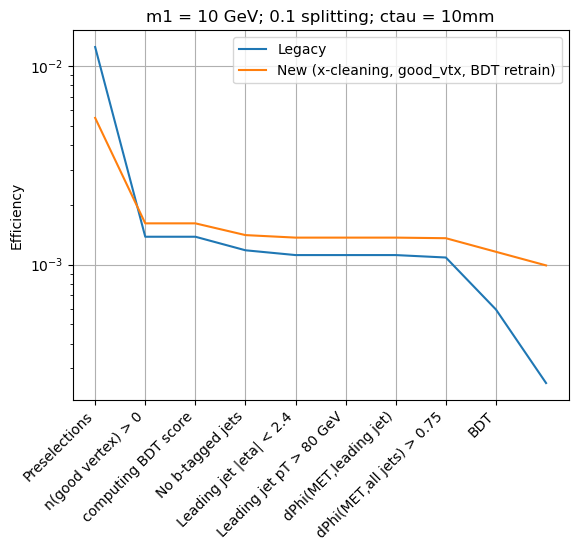

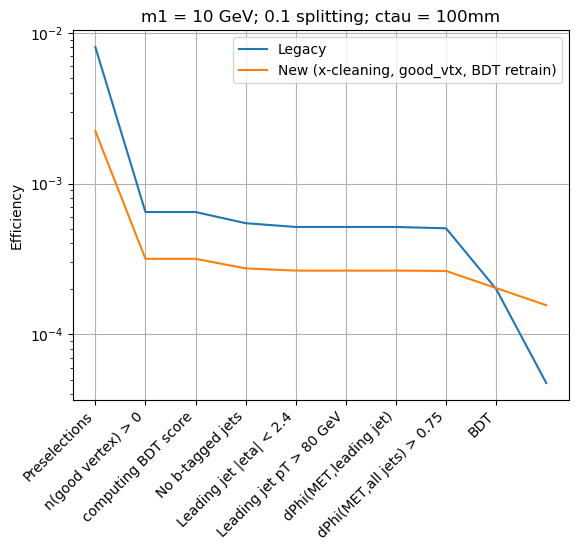

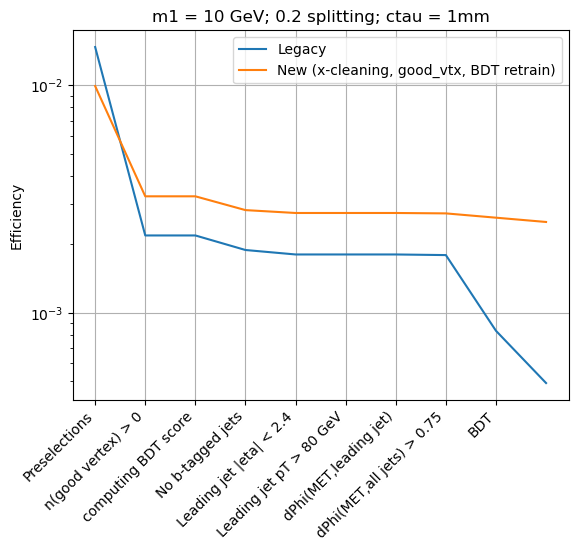

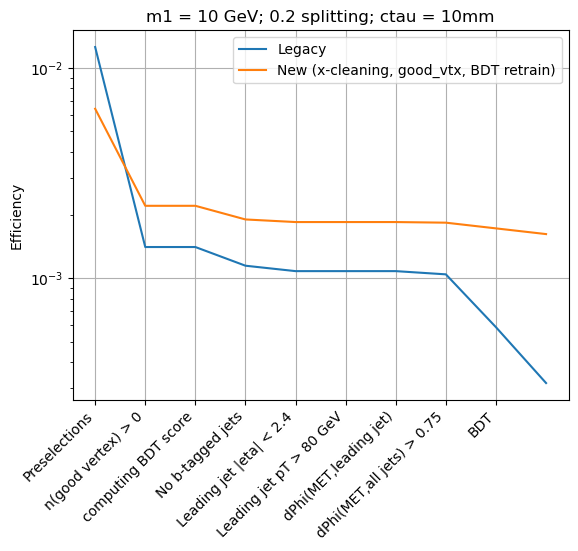

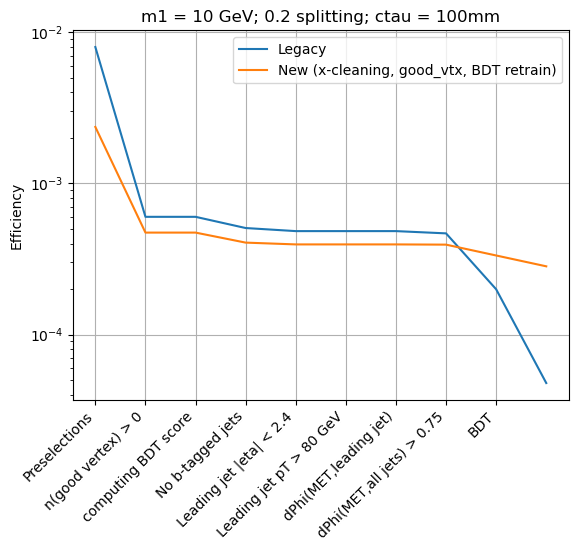

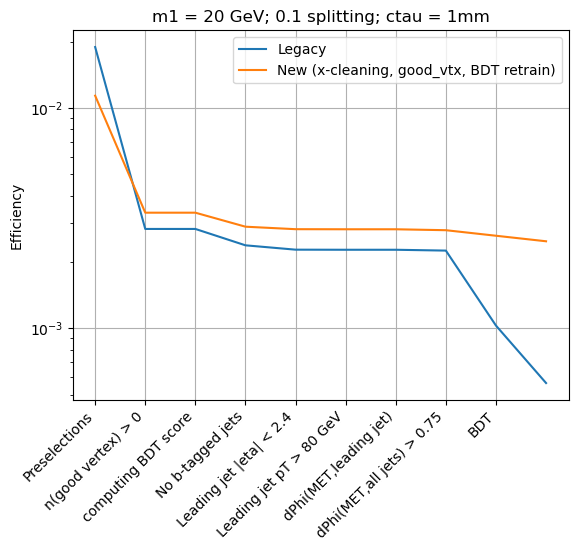

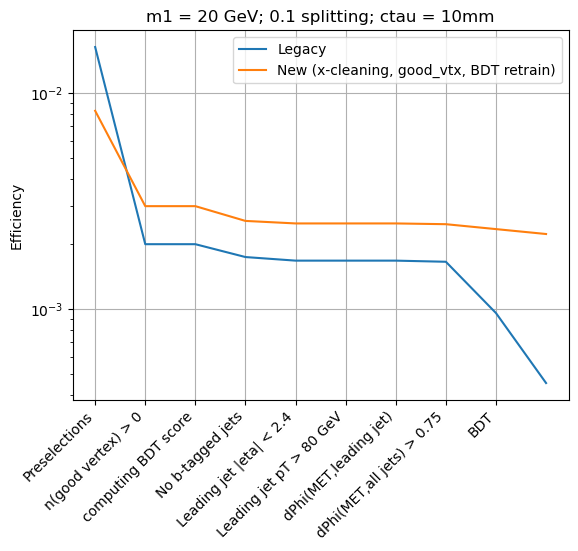

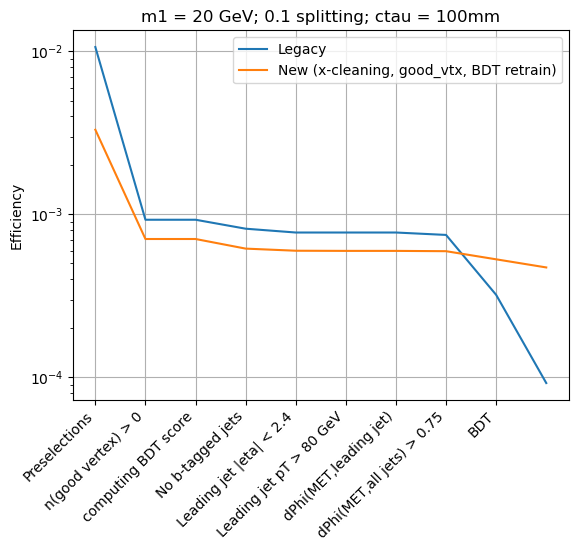

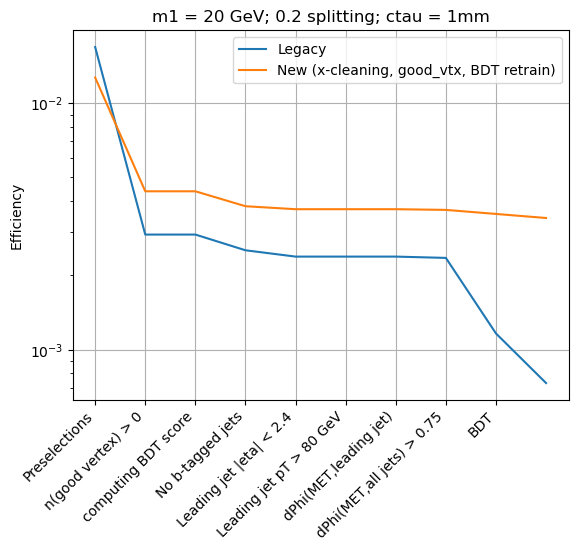

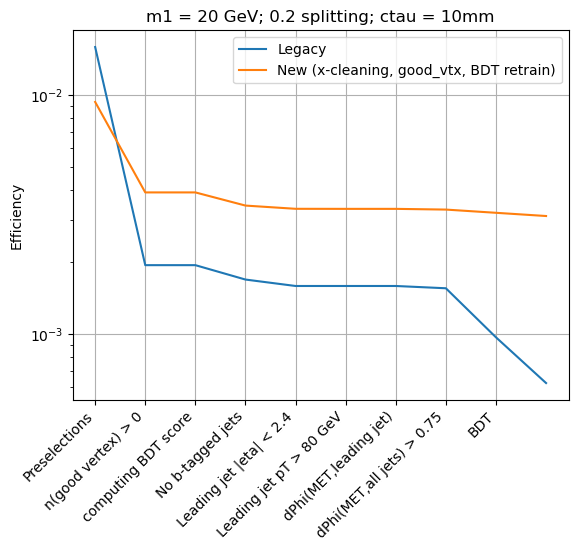

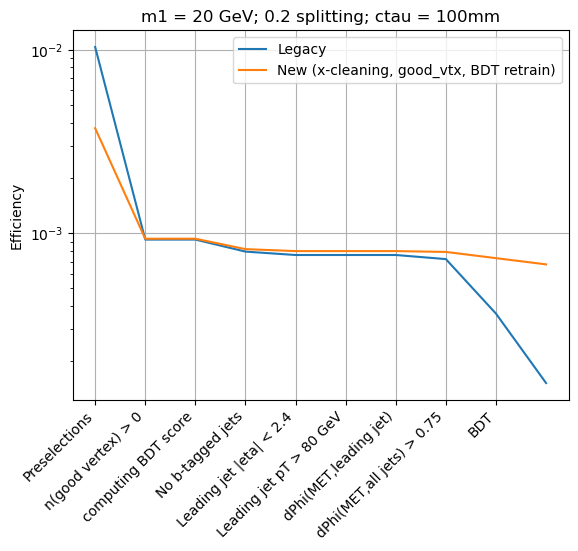

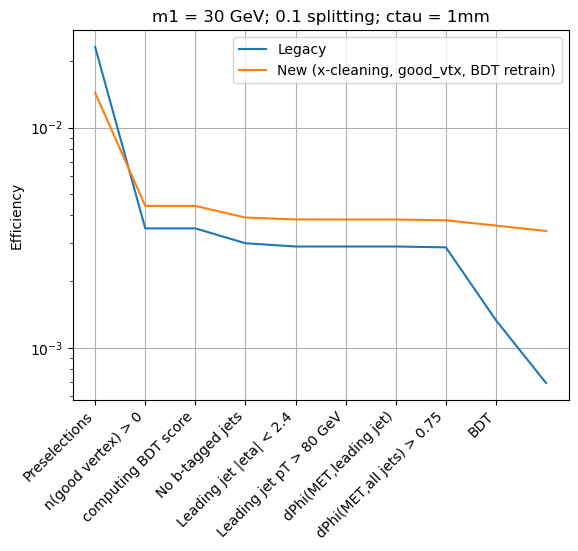

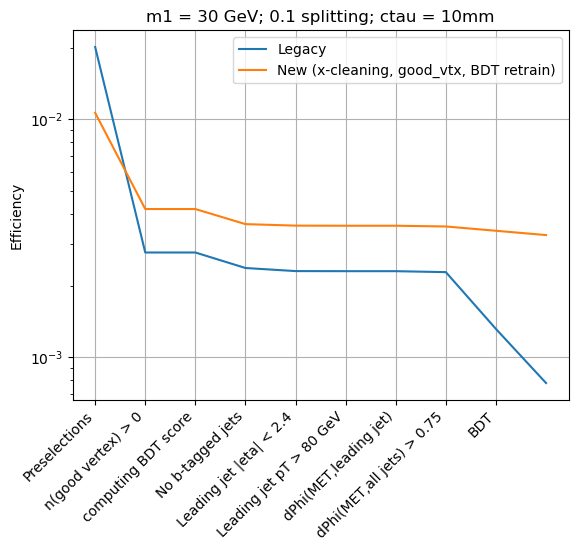

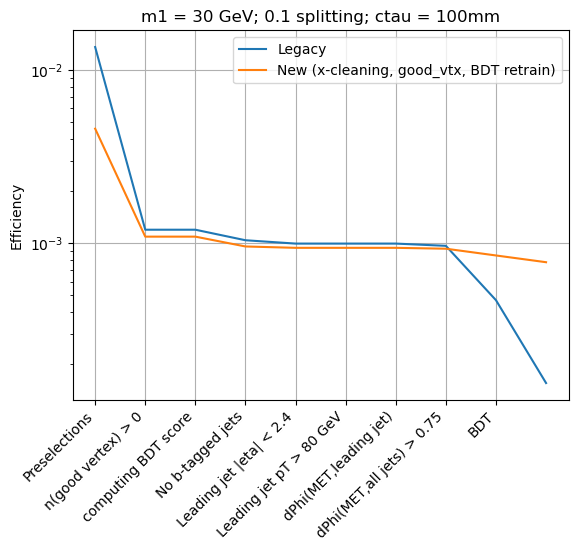

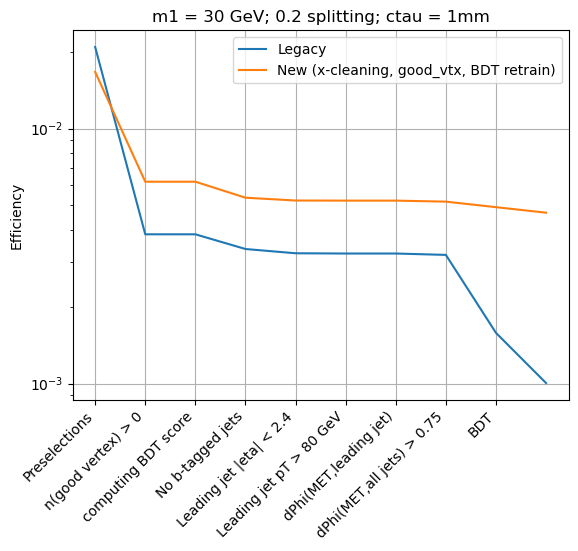

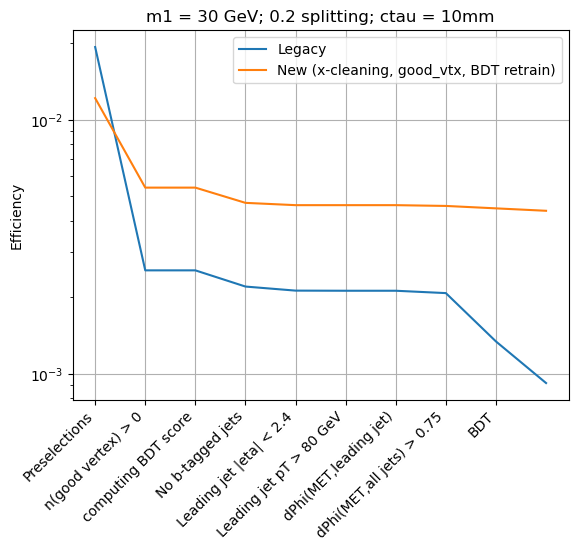

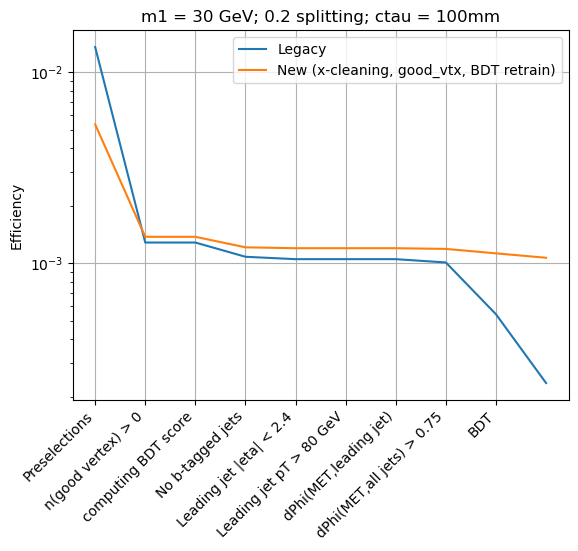

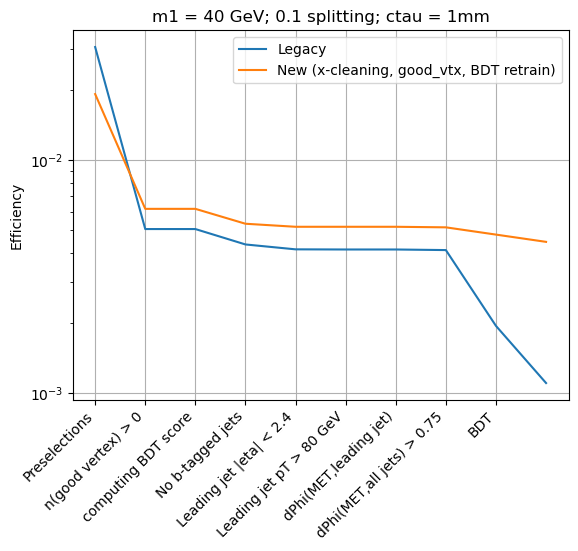

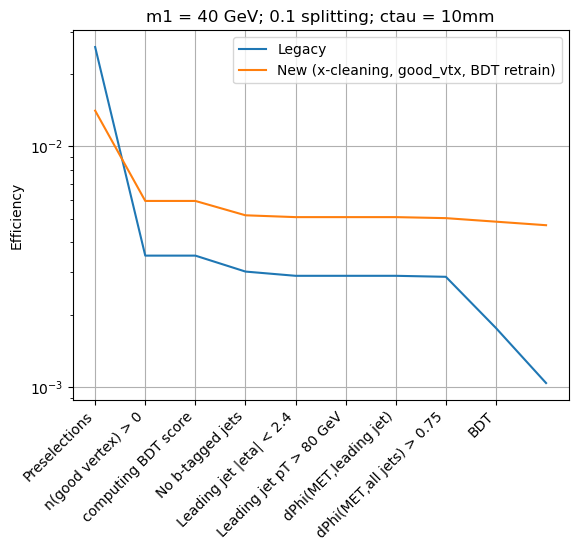

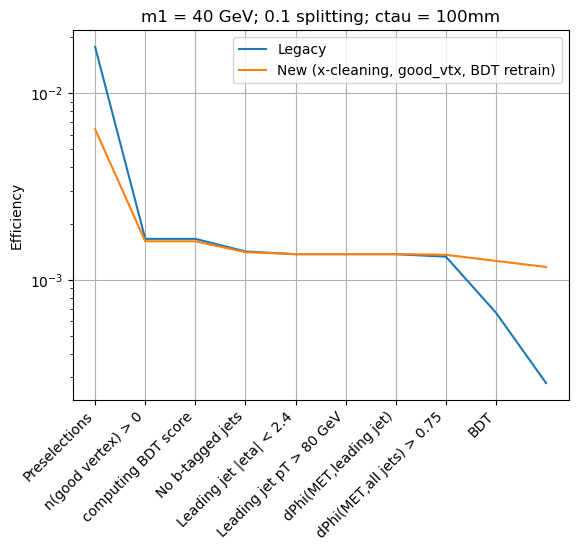

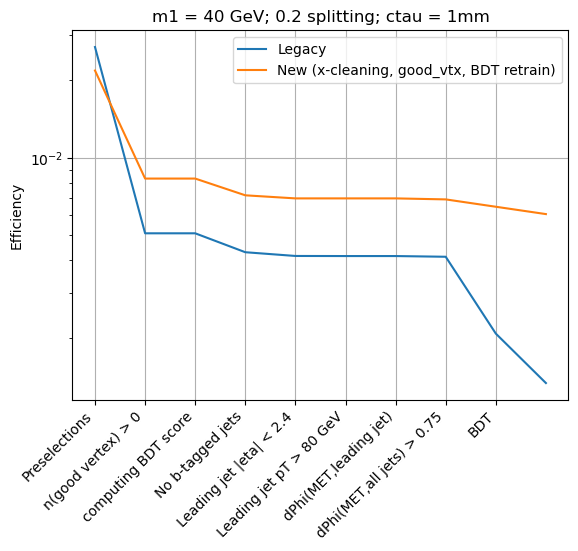

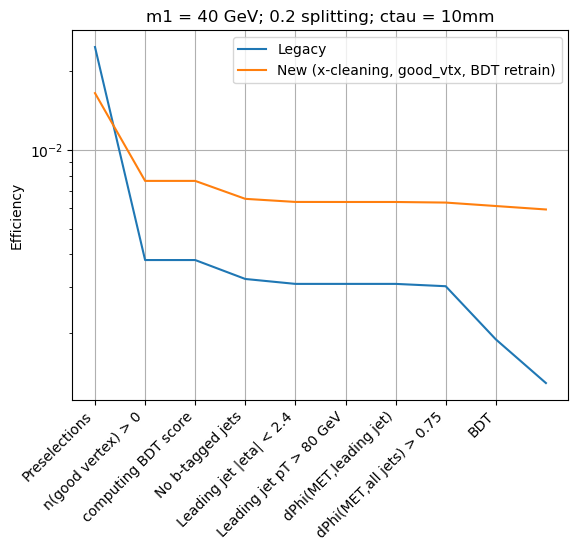

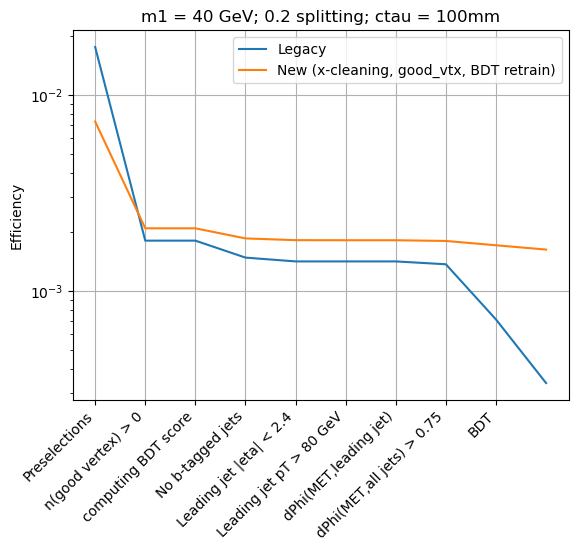

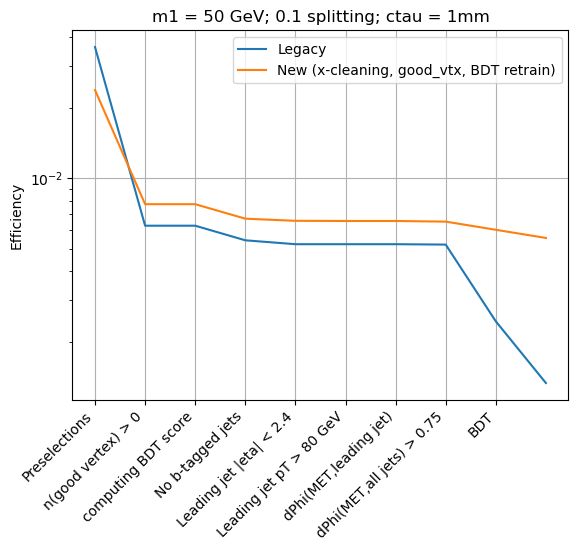

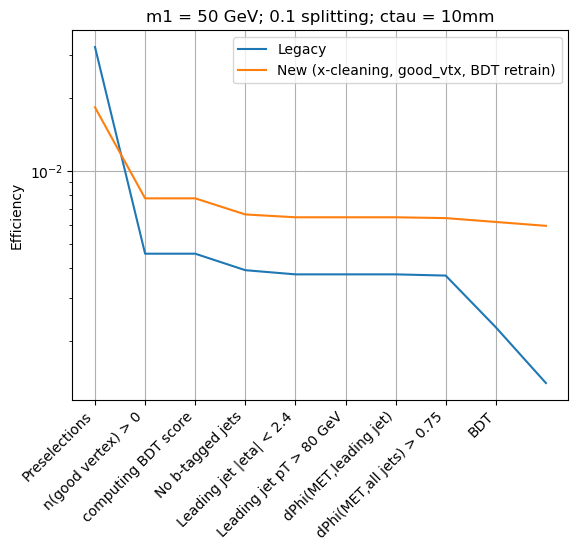

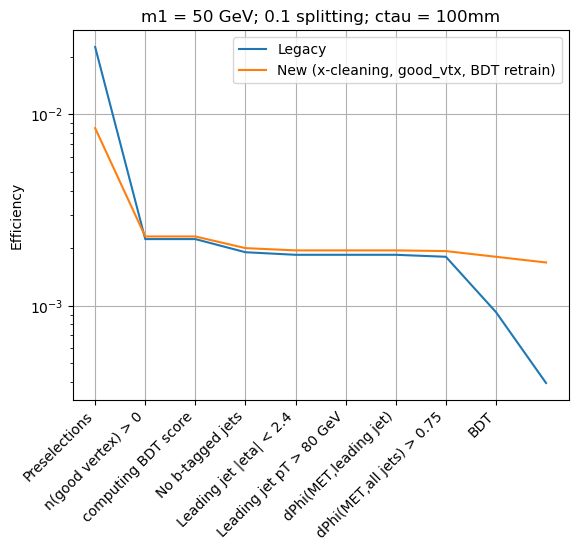

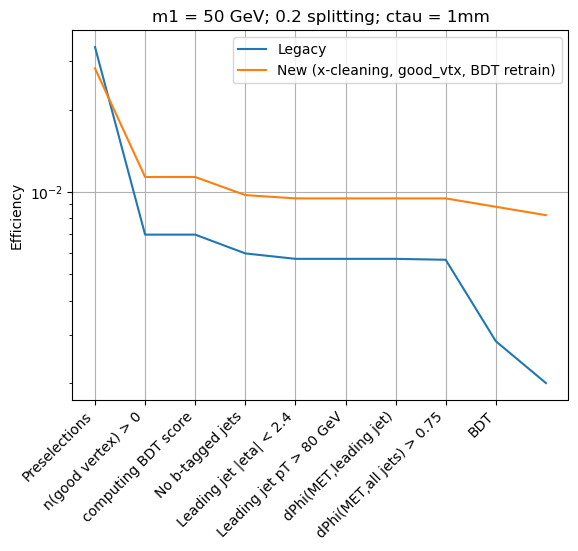

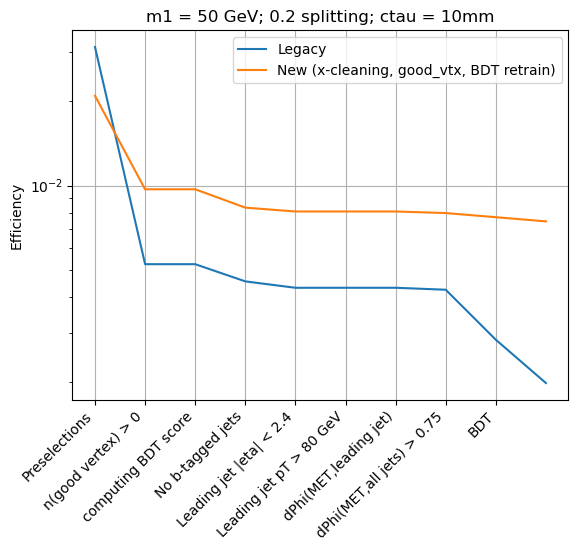

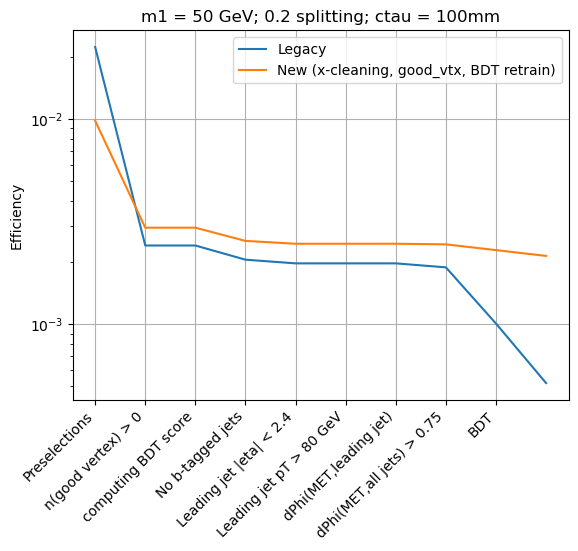

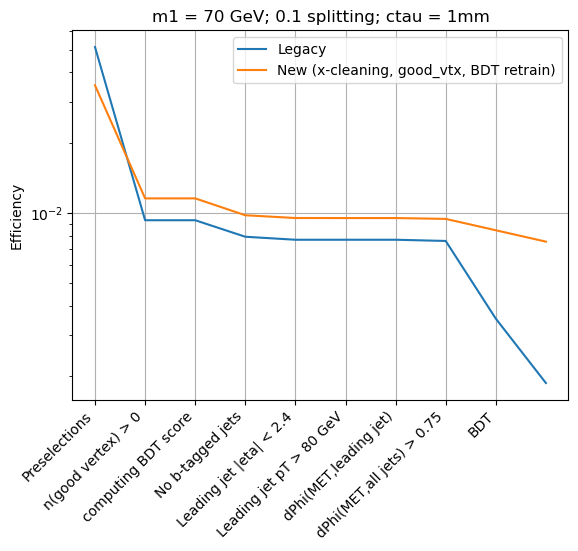

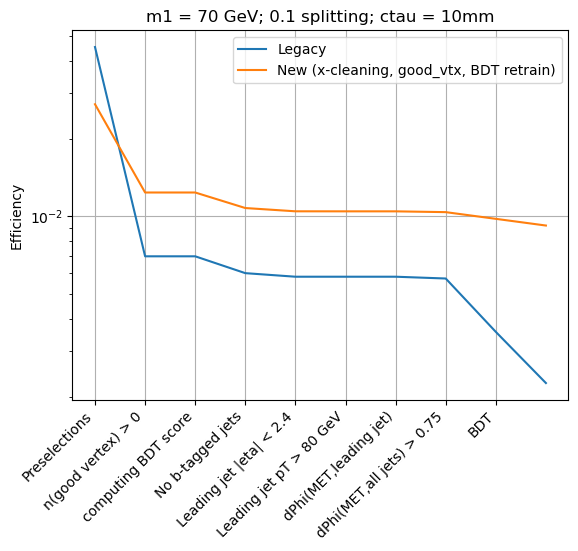

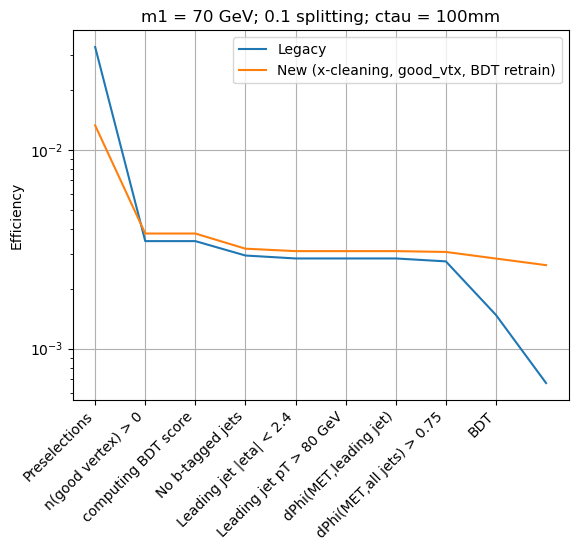

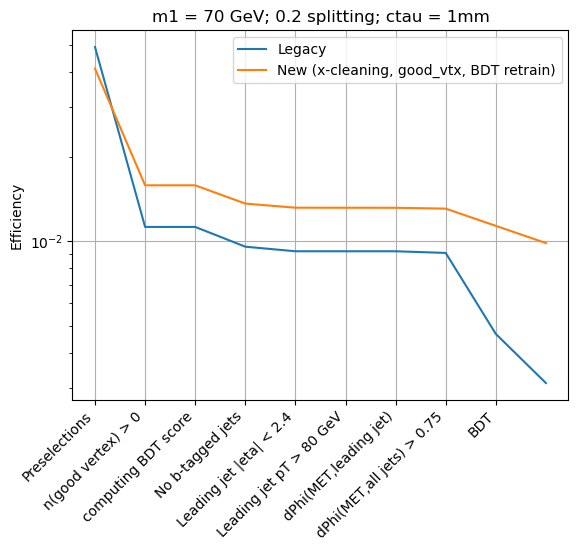

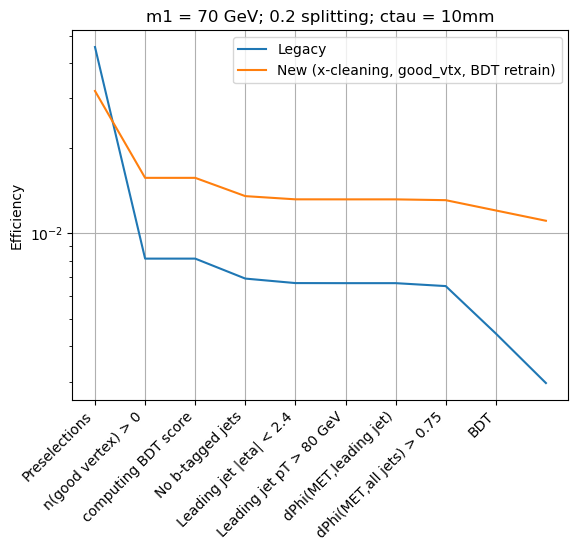

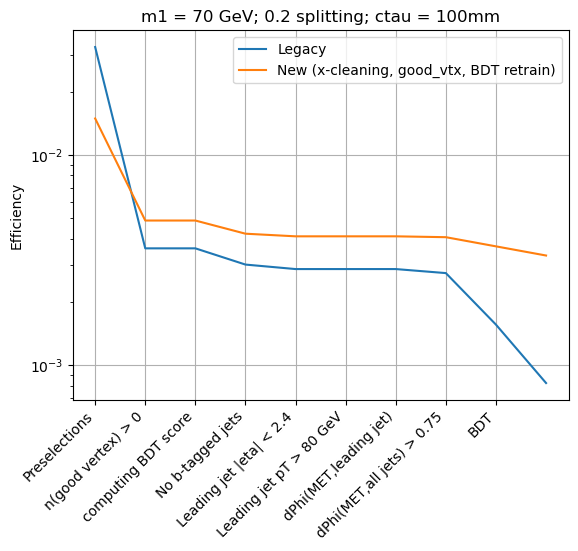

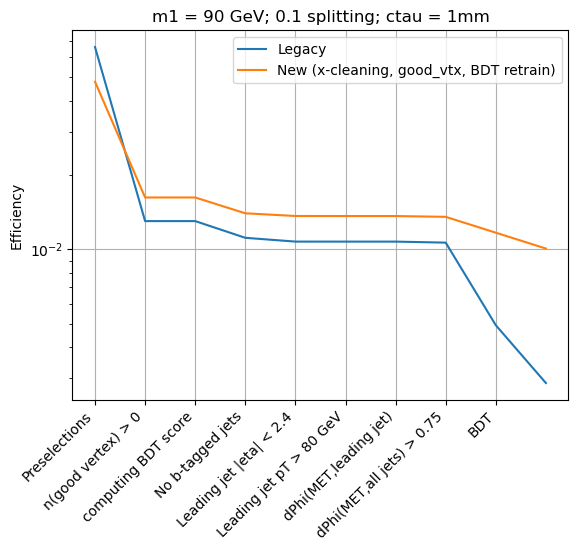

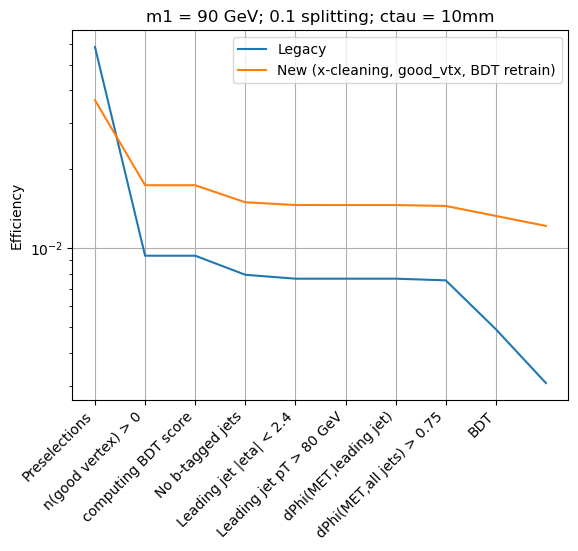

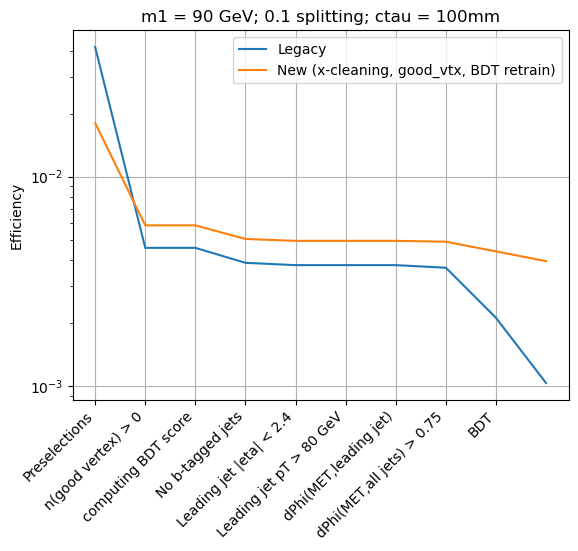

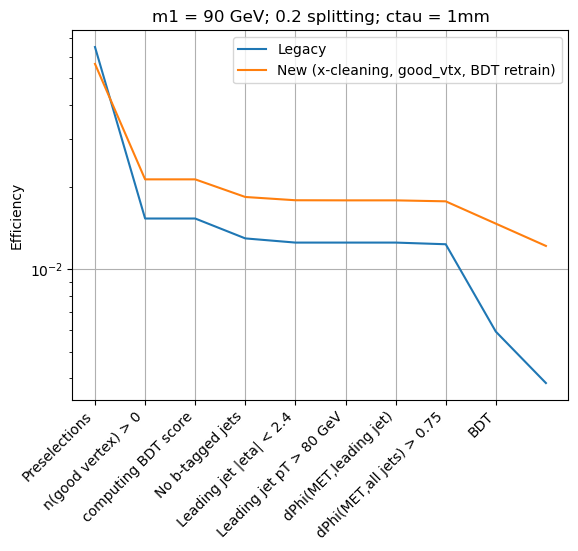

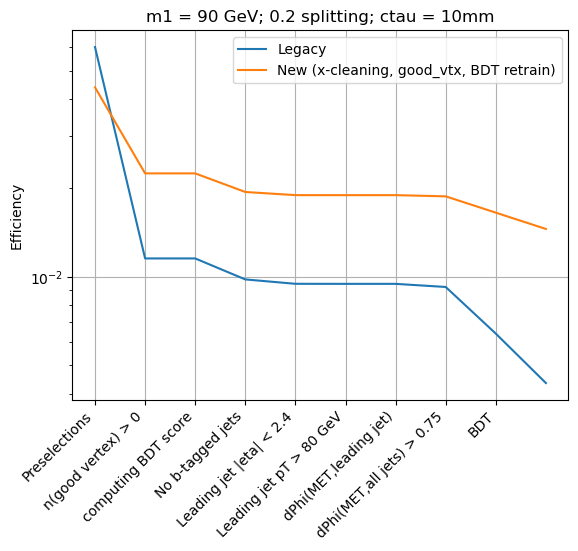

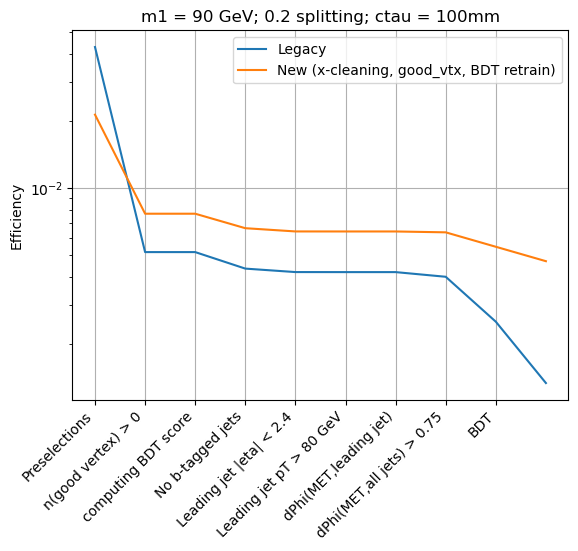

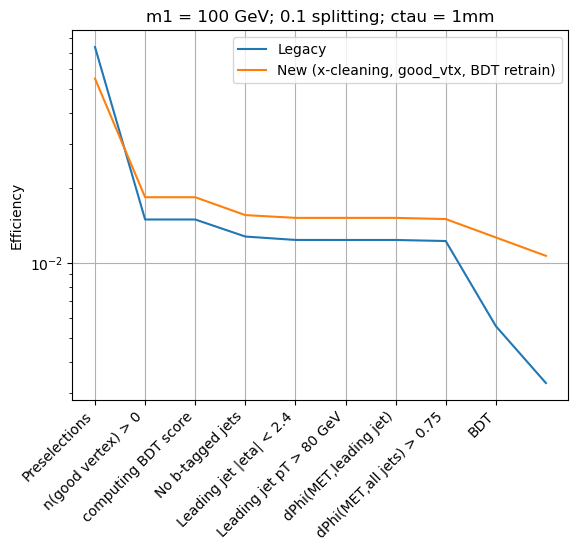

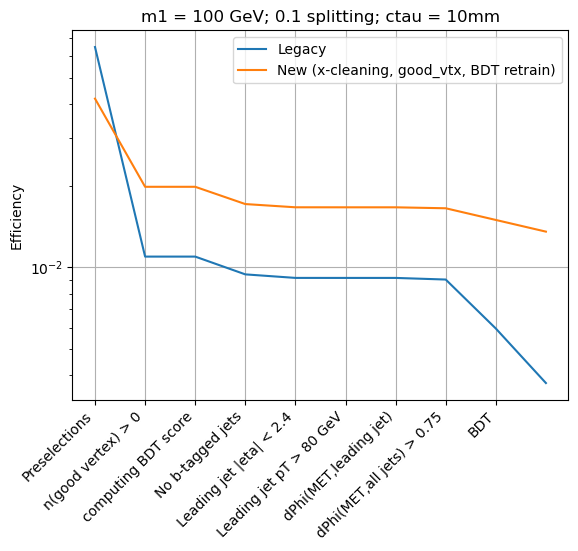

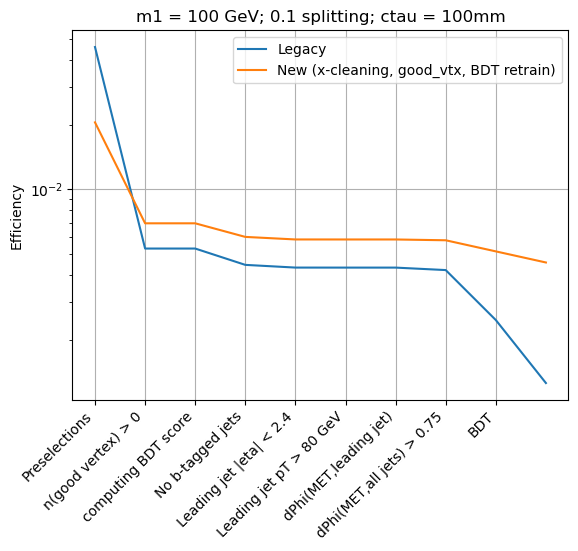

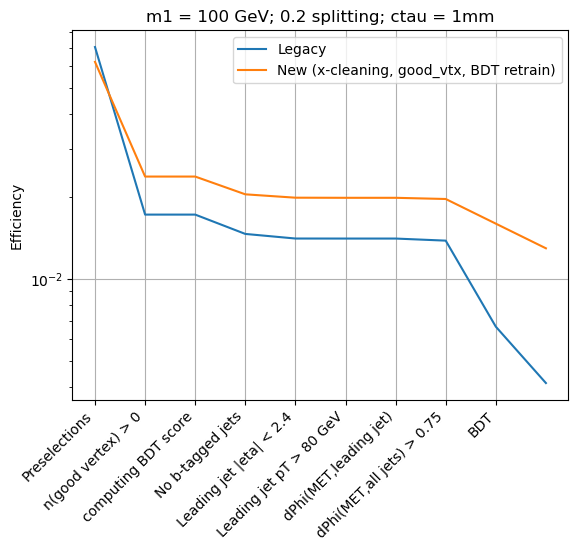

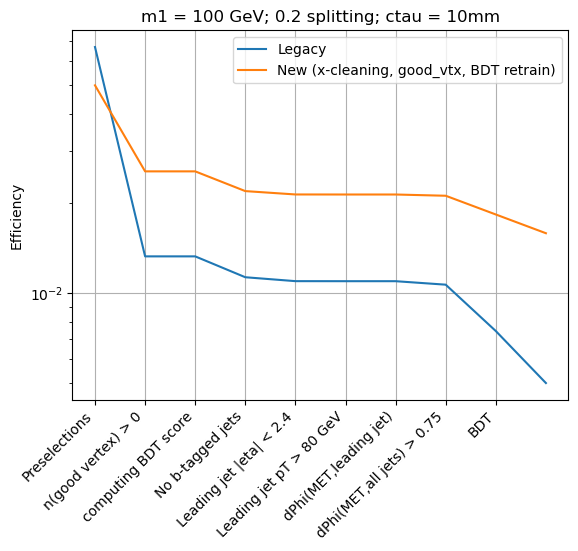

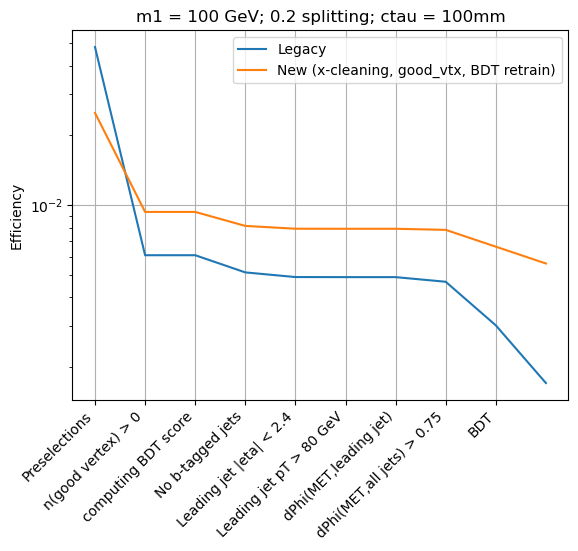

In [19]:
m1_list = [5, 10, 20, 30, 40, 50, 70, 90, 100]
delta_list = [0.1, 0.2]
ctau_list = [1, 10, 100]

for m1 in m1_list:
    for delta in delta_list:
        for ctau in ctau_list:
            title = f'm1 = {m1} GeV; {delta} splitting; ctau = {ctau}mm'
            m1s = []
            deltas = []
            ctaus = []

            m1s.append(m1)
            deltas.append(delta)
            ctaus.append(ctau)

            ylabel = 'Efficiency'

            plot_signal_efficiency(sig_histo_legacy, df_cutflow_legacy, df_purity_legacy, m1s, deltas, ctaus, label = 'Legacy', doLog = True, ylabel = ylabel, title = title)
            plot_signal_efficiency(sig_histo, df_cutflow, df_purity, m1s, deltas, ctaus, label = 'New (x-cleaning, good_vtx, BDT retrain)', doLog = True, ylabel = ylabel, title = title)
            
            plt.grid()
            plt.show()

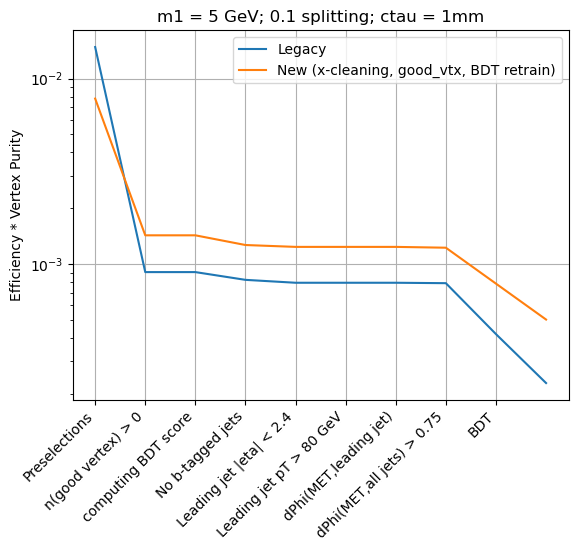

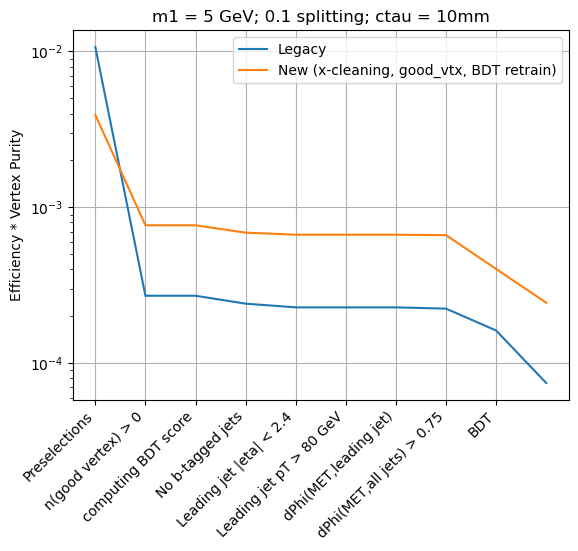

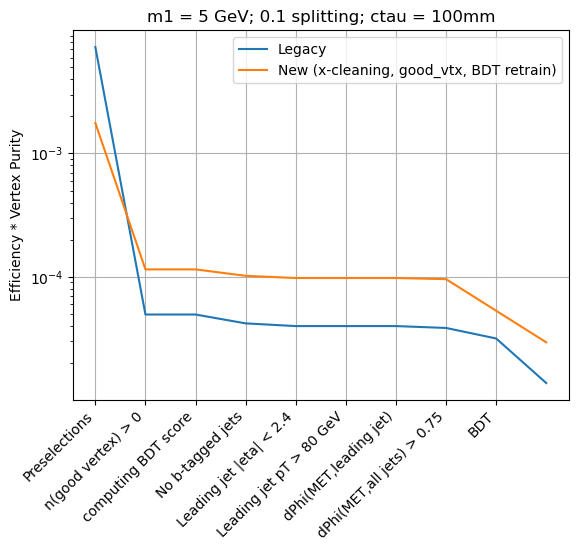

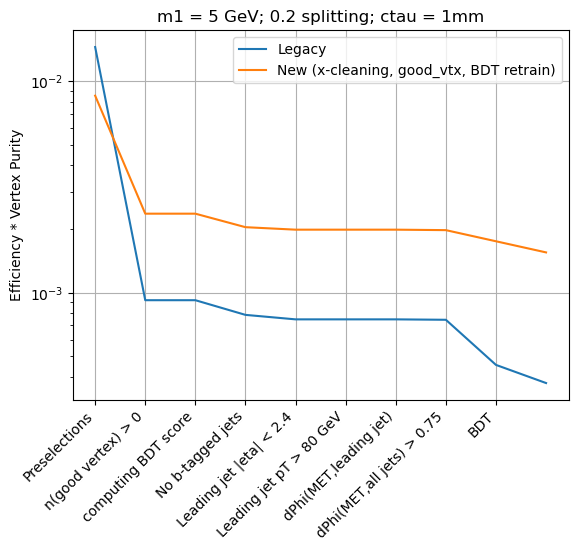

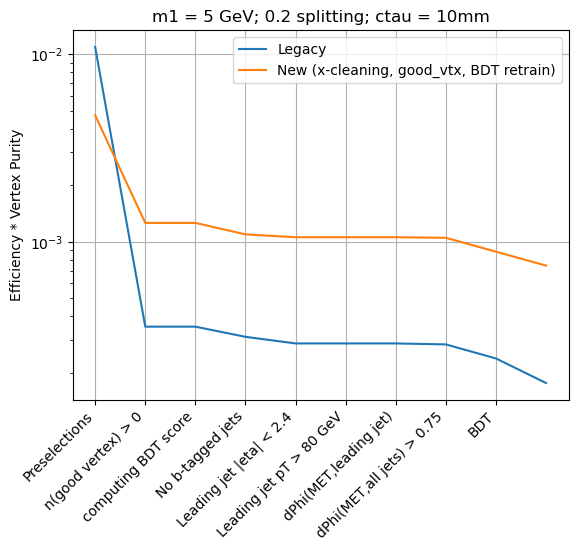

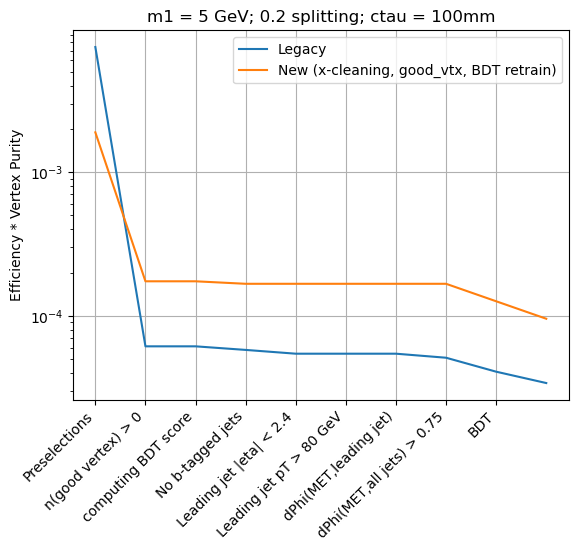

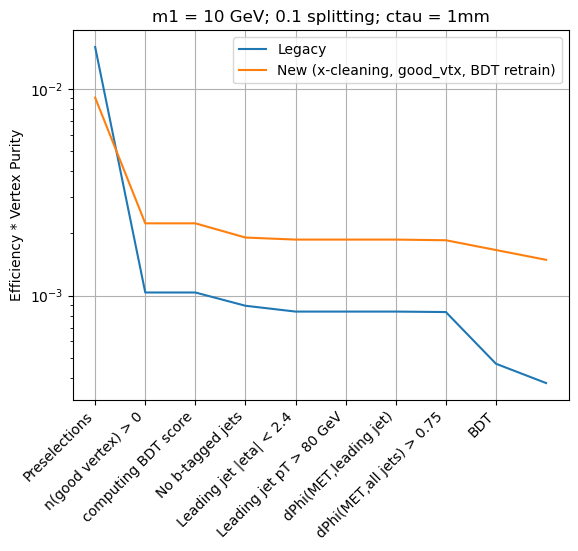

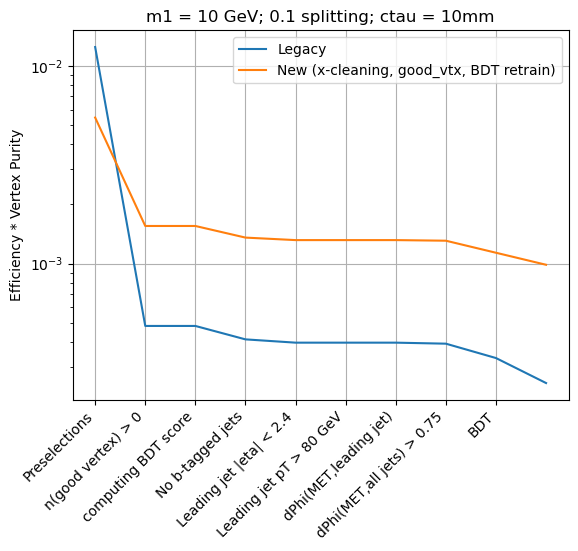

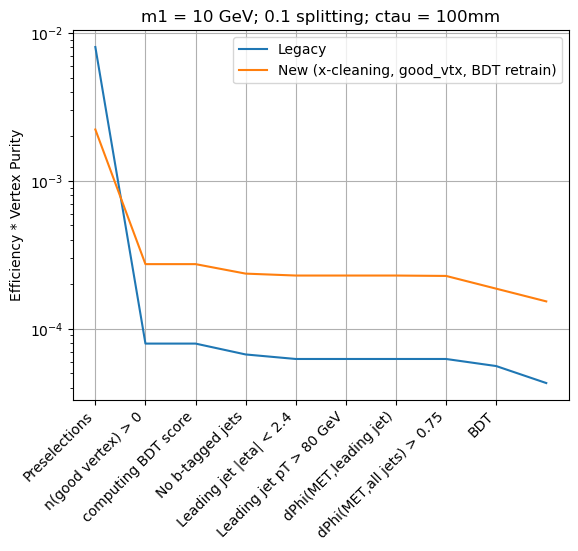

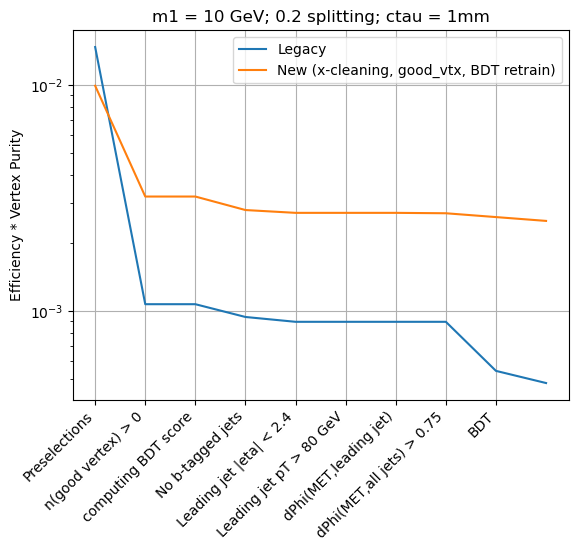

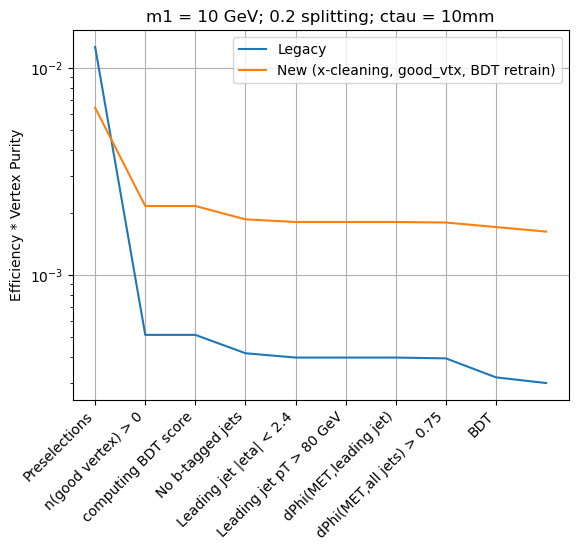

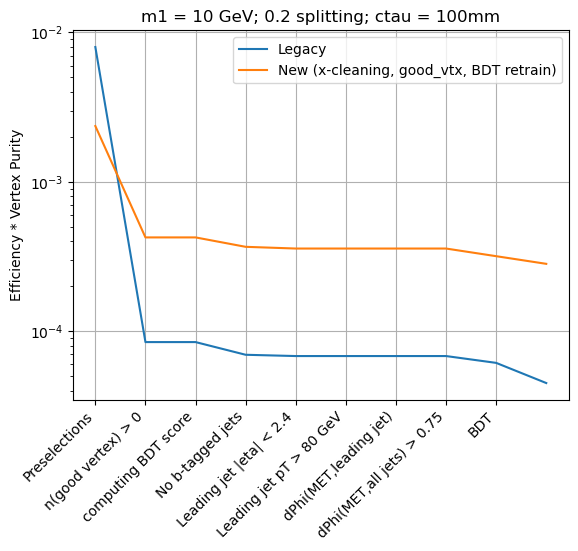

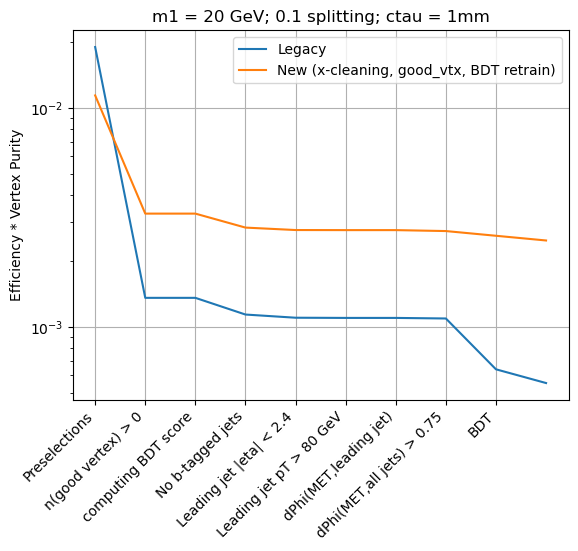

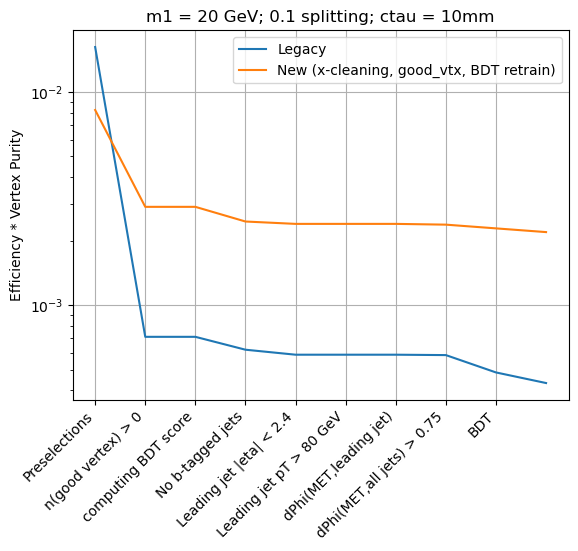

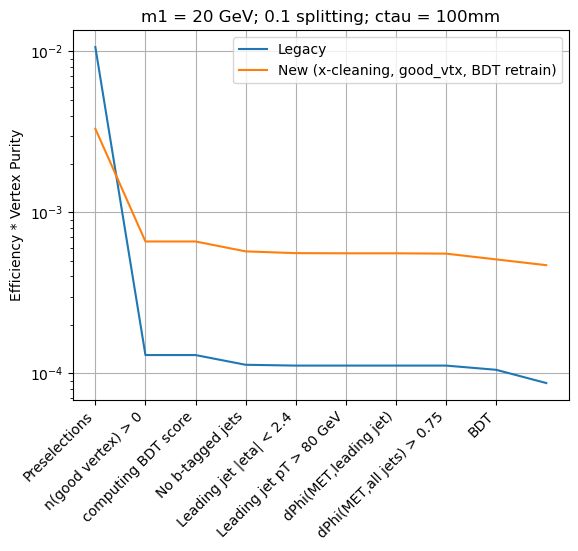

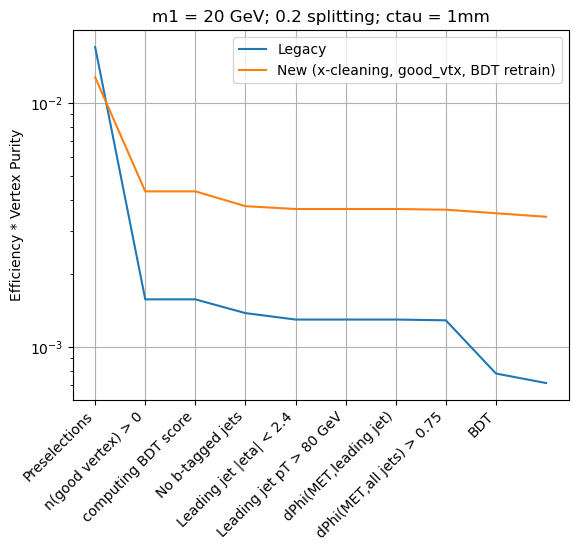

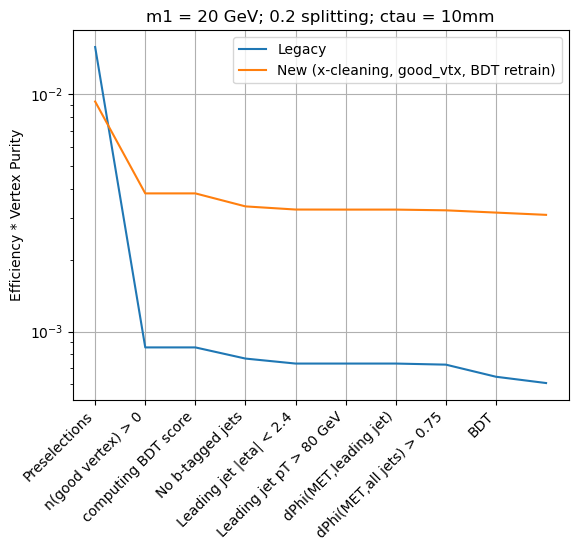

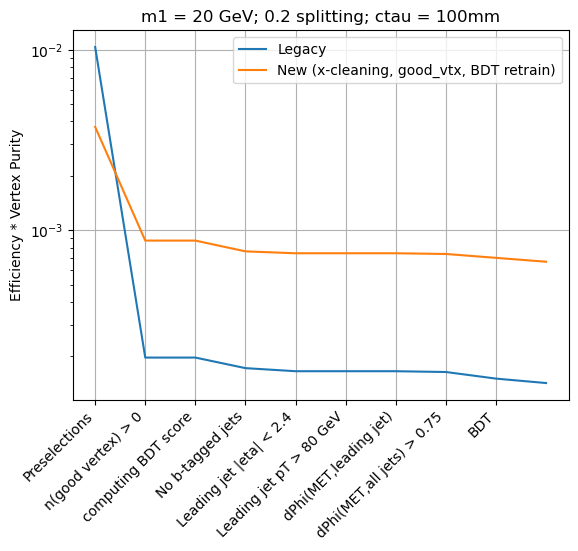

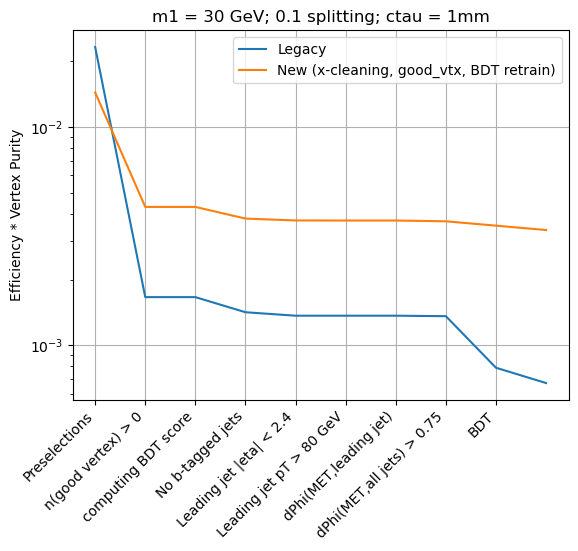

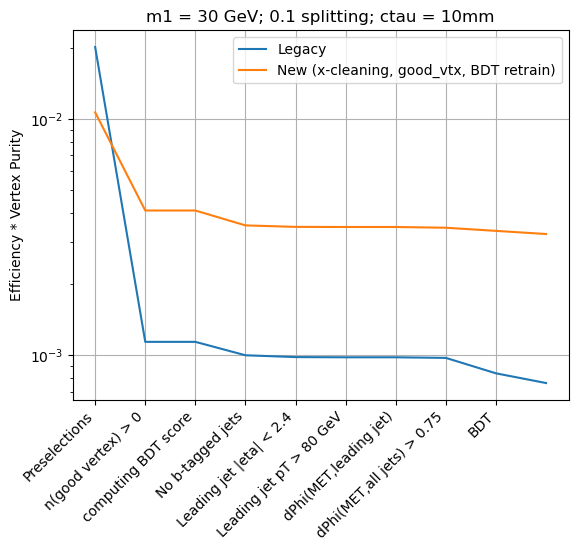

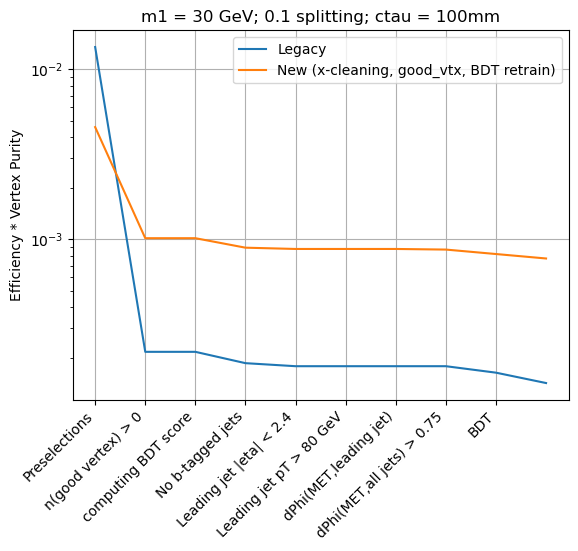

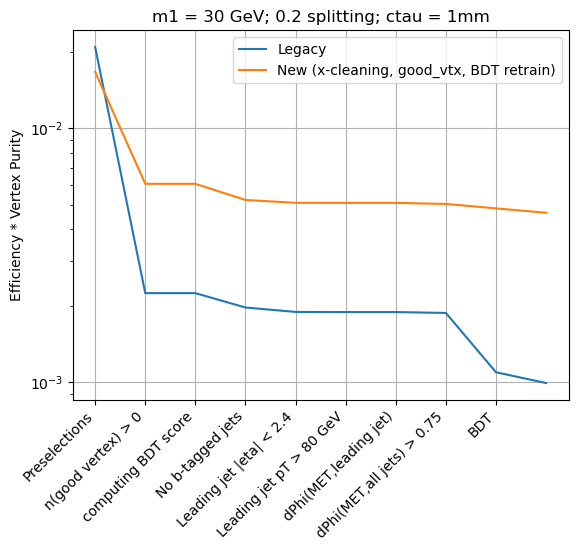

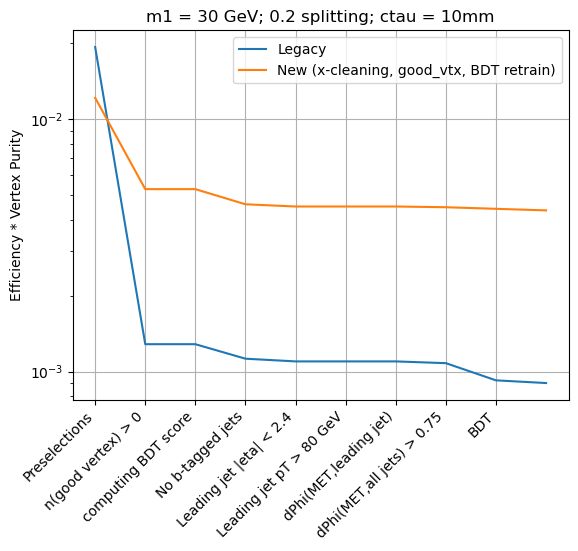

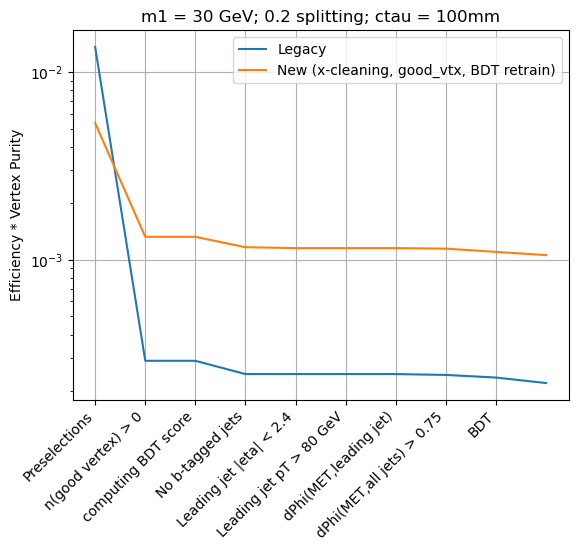

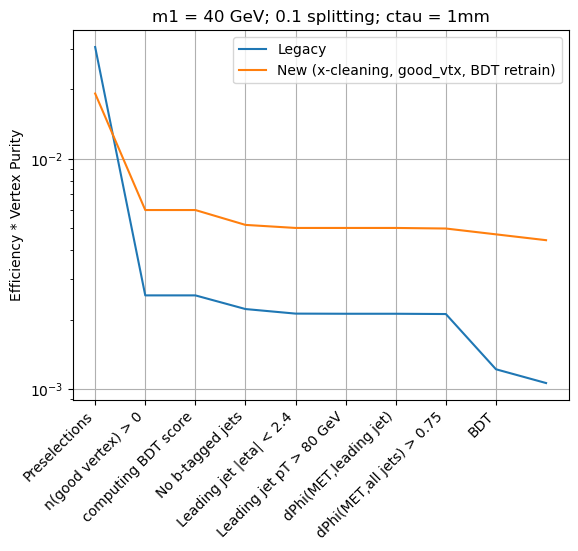

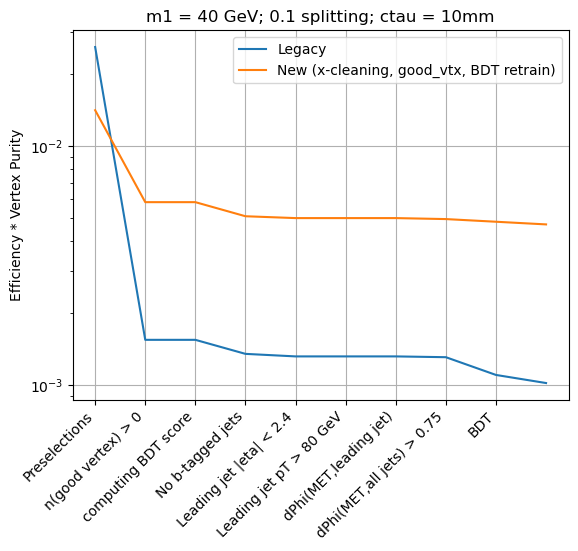

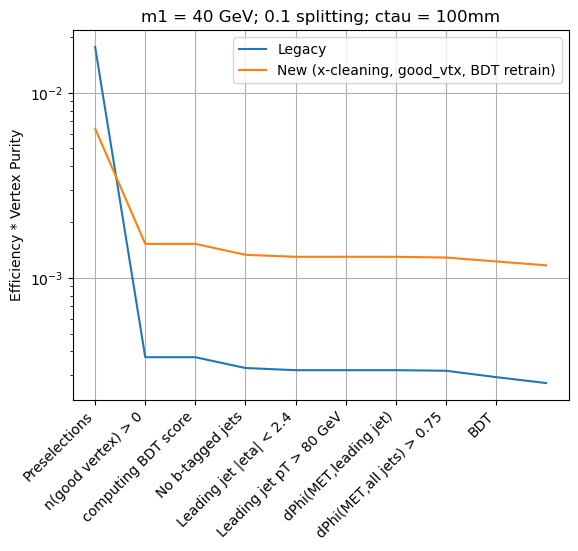

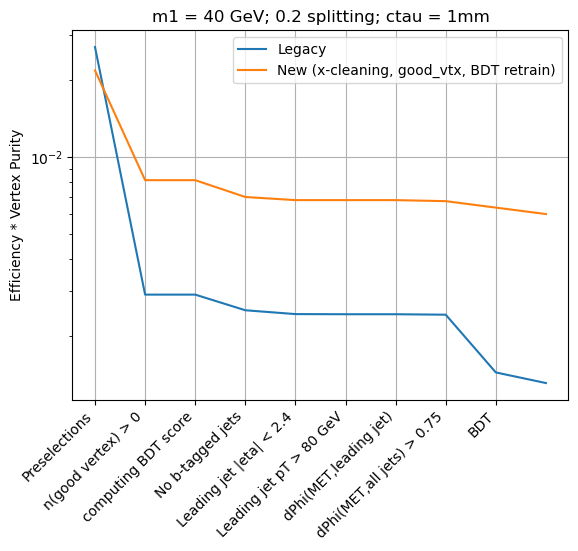

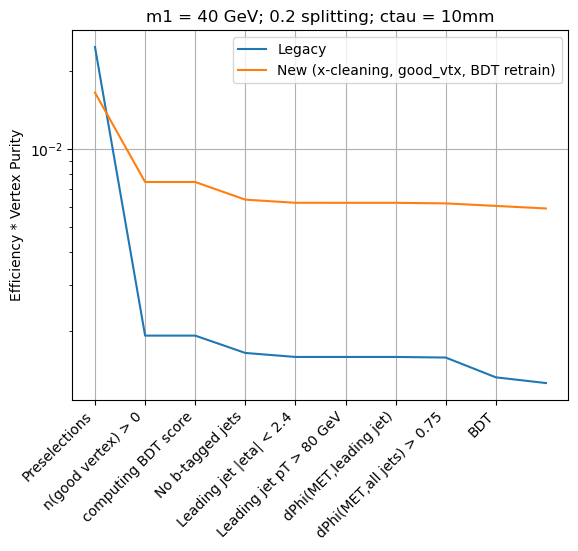

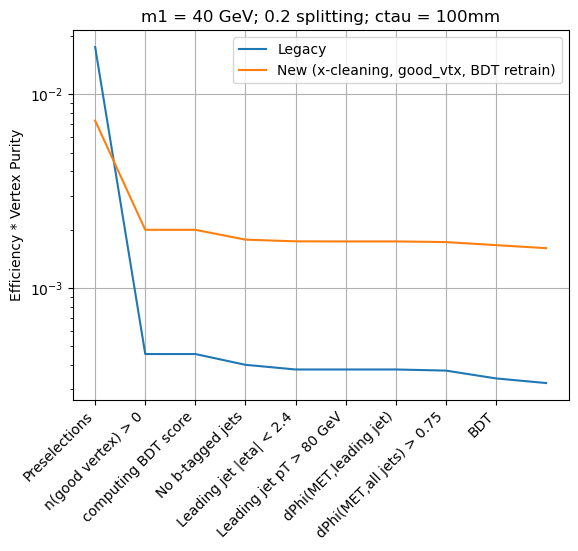

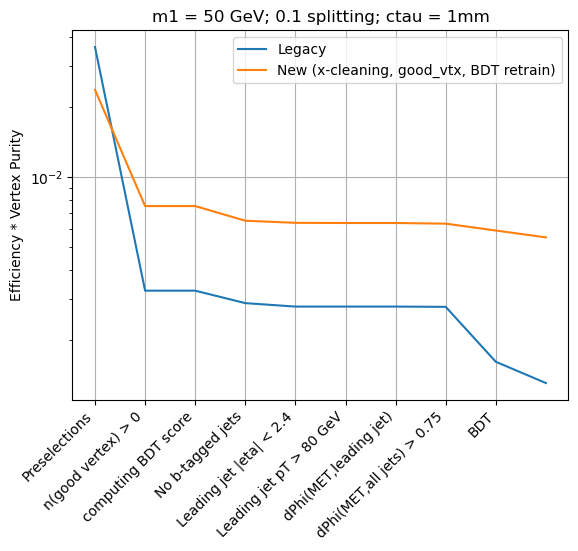

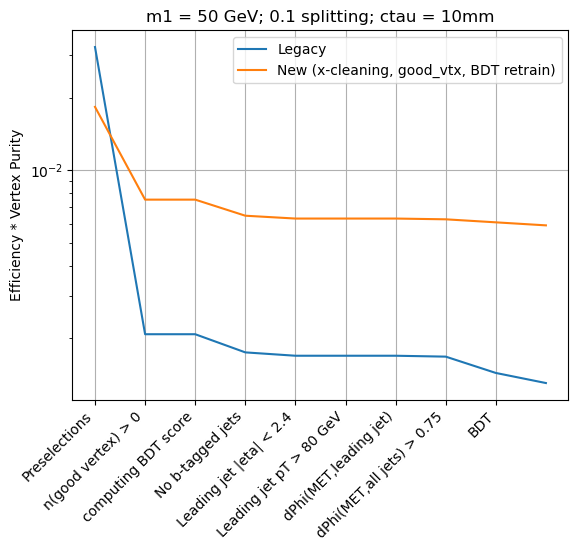

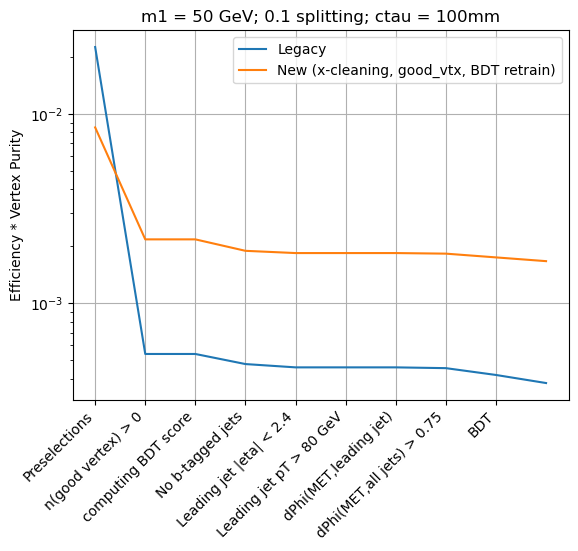

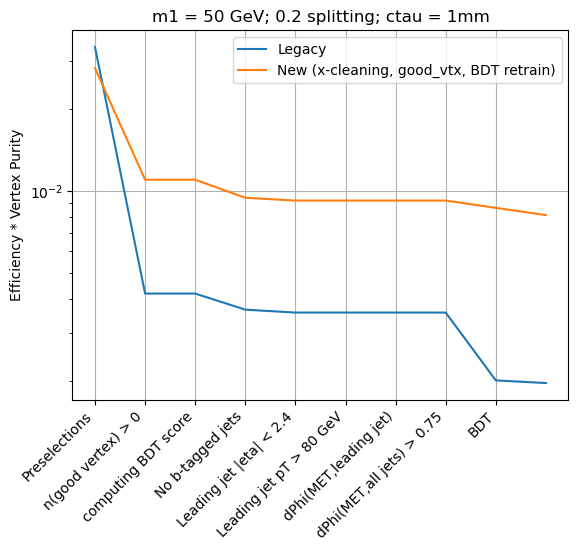

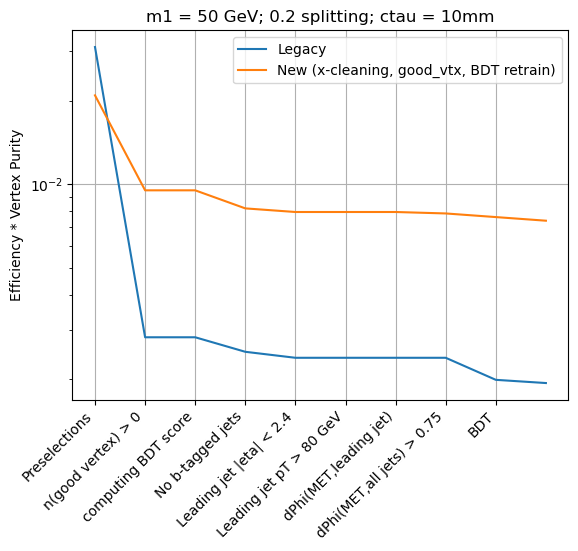

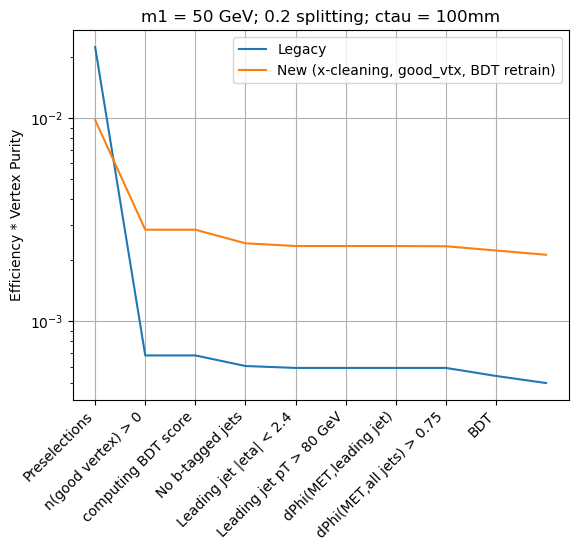

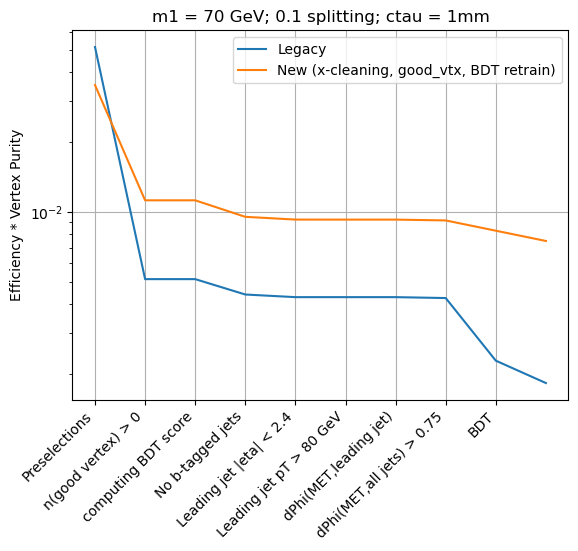

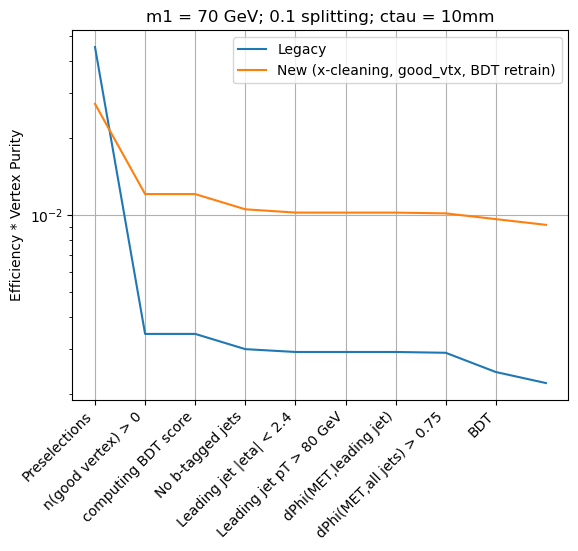

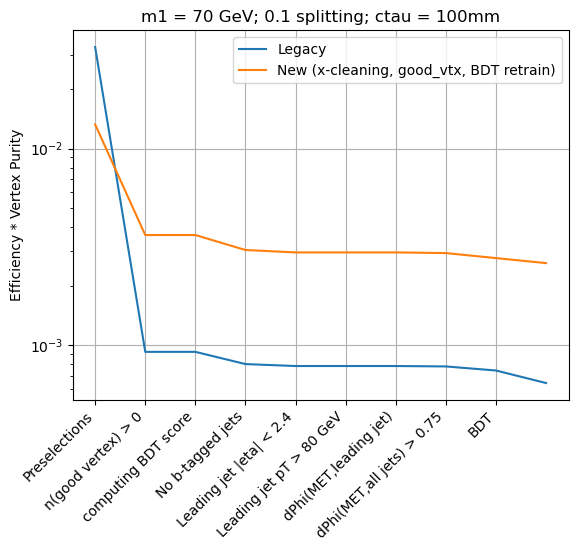

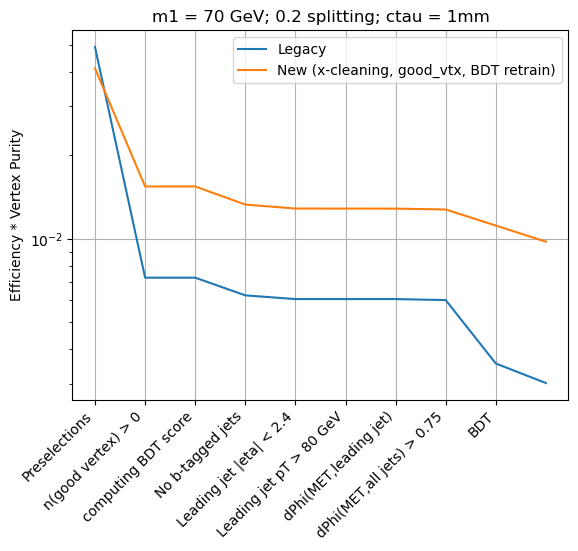

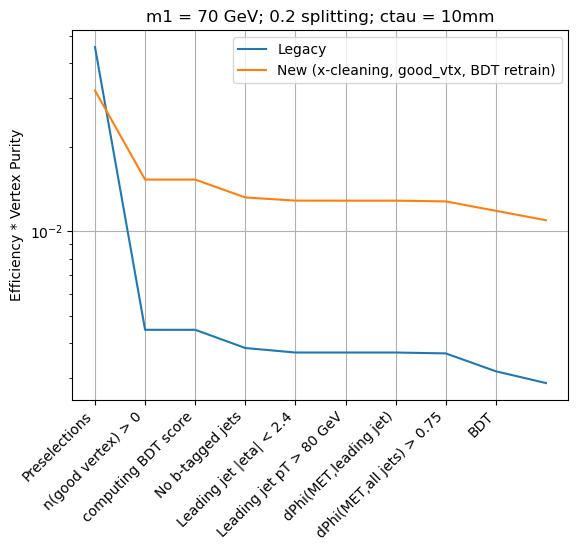

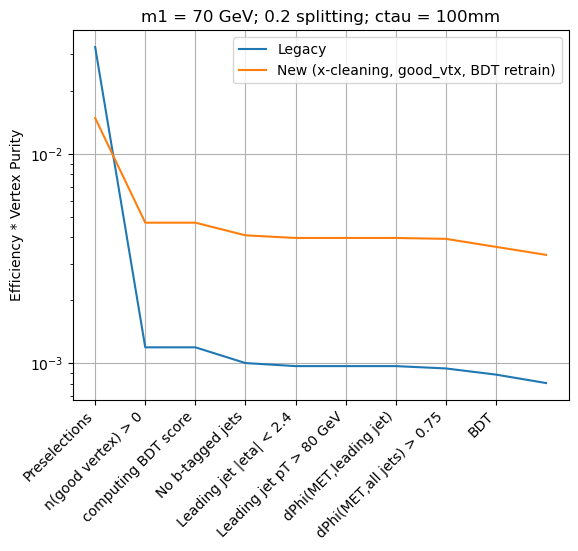

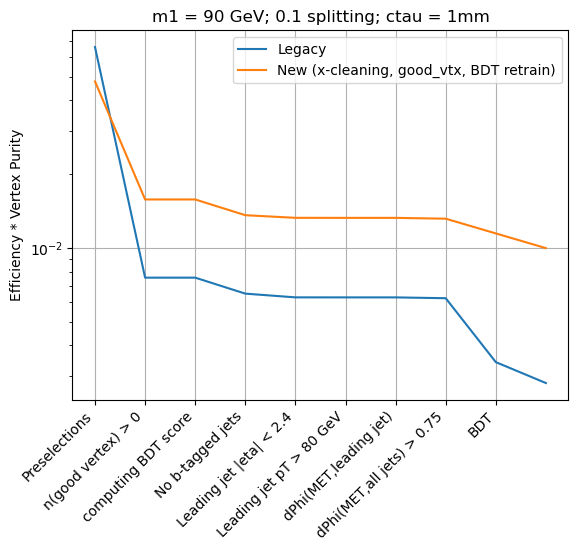

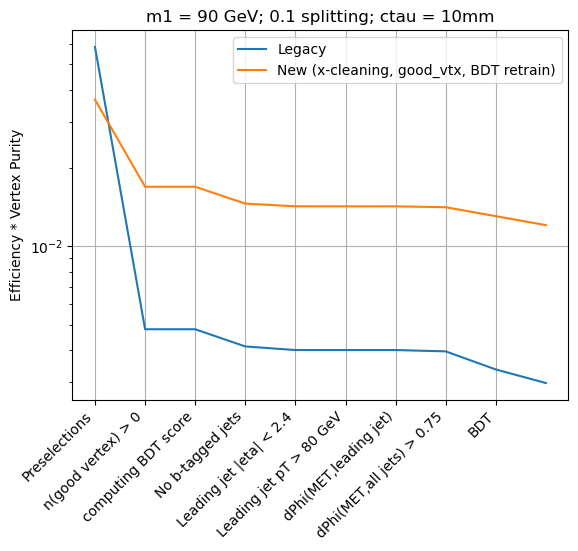

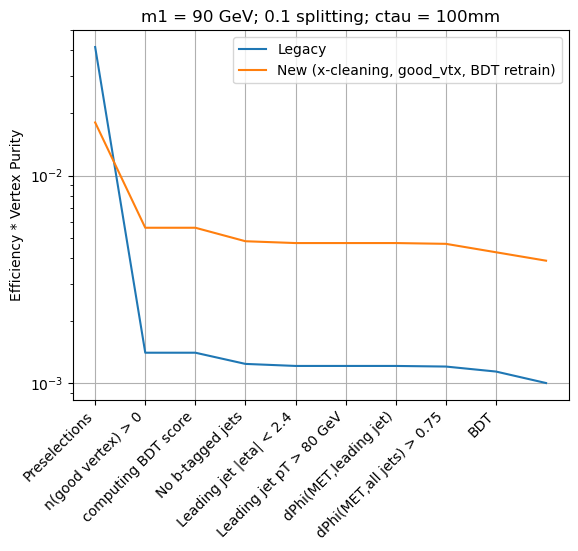

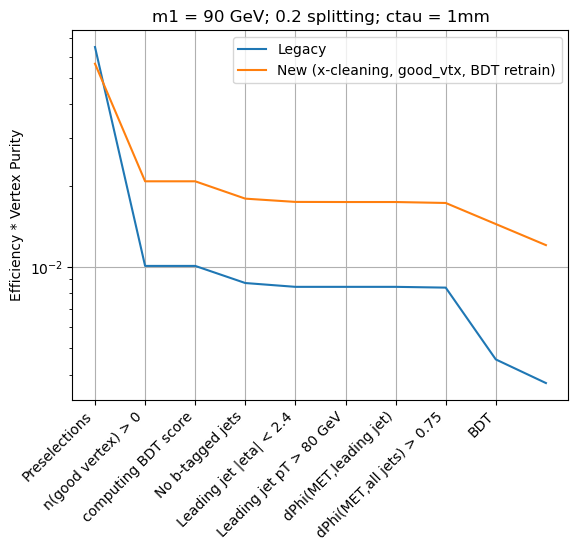

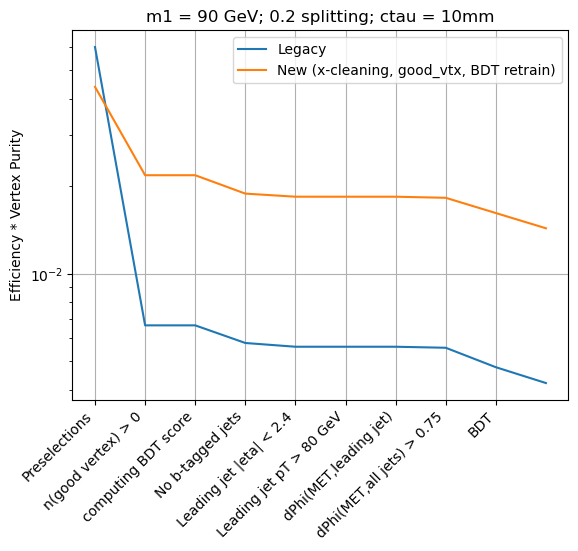

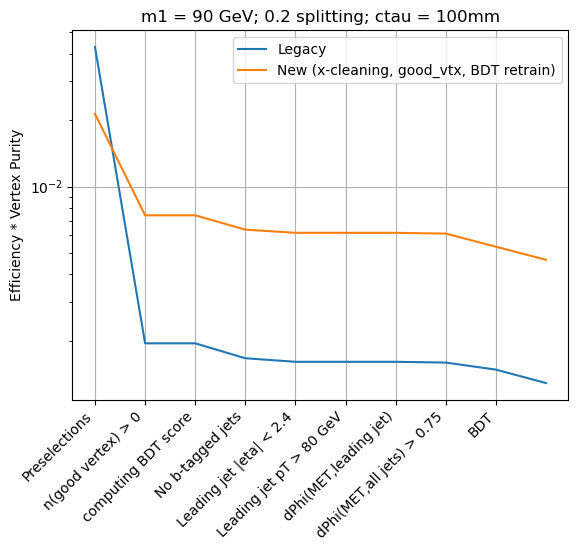

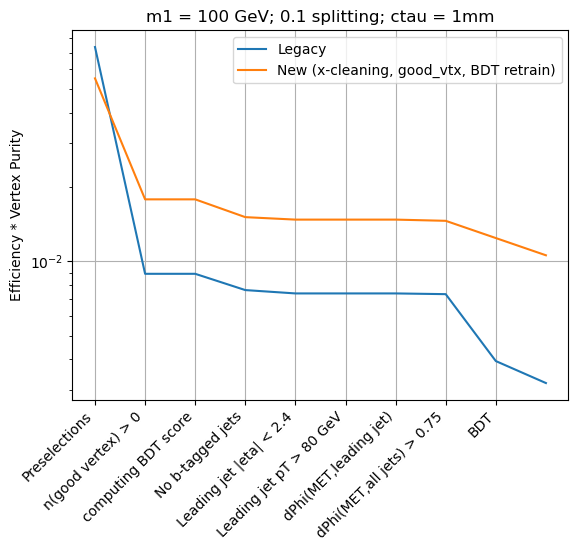

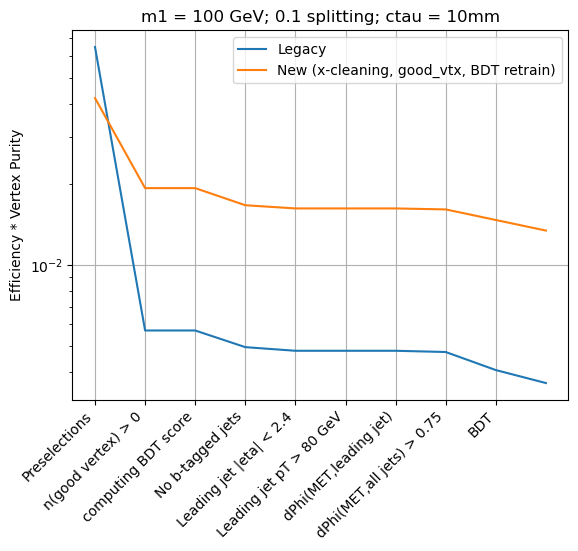

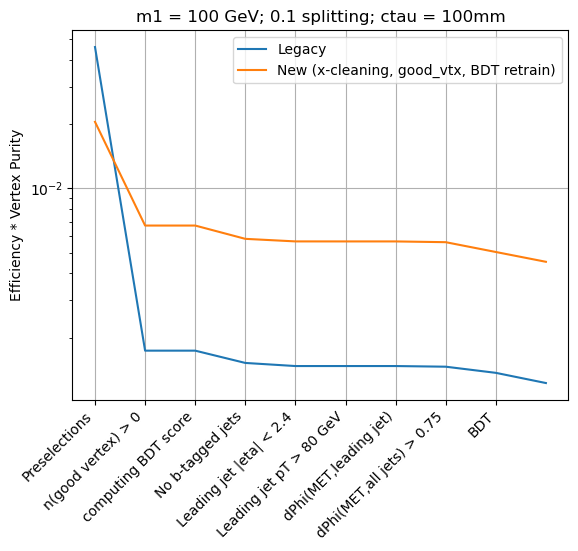

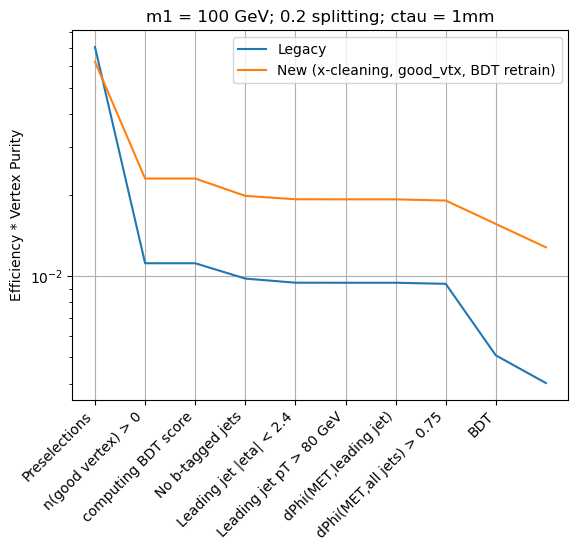

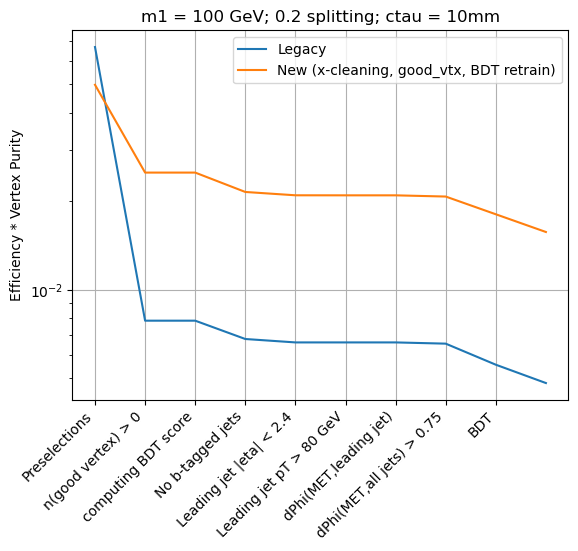

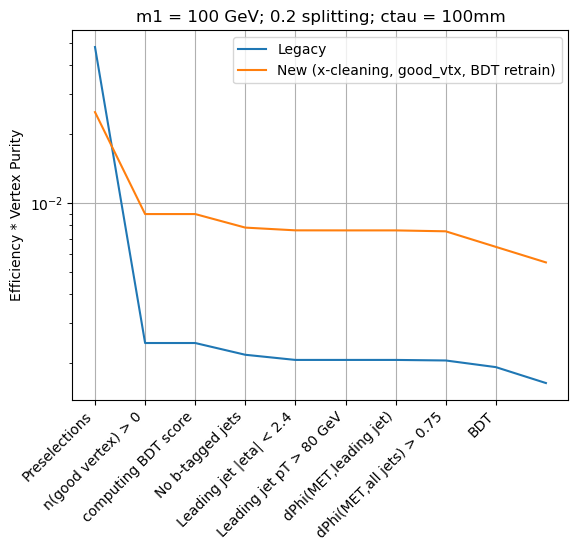

In [20]:
m1_list = [5, 10, 20, 30, 40, 50, 70, 90, 100]
delta_list = [0.1, 0.2]
ctau_list = [1, 10, 100]

multPurity = True

for m1 in m1_list:
    for delta in delta_list:
        for ctau in ctau_list:
            title = f'm1 = {m1} GeV; {delta} splitting; ctau = {ctau}mm'
            m1s = []
            deltas = []
            ctaus = []

            m1s.append(m1)
            deltas.append(delta)
            ctaus.append(ctau)

            ylabel = 'Efficiency * Vertex Purity'

            plot_signal_efficiency(sig_histo_legacy, df_cutflow_legacy, df_purity_legacy, m1s, deltas, ctaus, multPurity = multPurity, label = 'Legacy', doLog = True, ylabel = ylabel, title = title)
            plot_signal_efficiency(sig_histo, df_cutflow, df_purity, m1s, deltas, ctaus, multPurity = multPurity,  label = 'New (x-cleaning, good_vtx, BDT retrain)', doLog = True, ylabel = ylabel, title = title)

            plt.grid()
            plt.show()